# Predicting Domestic Violence - Redux

By Ednalyn C. De Dios  
(210) 236-2685  
ednalyn.dedios@gmail.com  

## INTRODUCTION

> Using data from the Chicago Women's Health Risk Study, this data science project attempts to make a model that predicts the likelihood of reassault based on several factors.

## // PLAN

- [x] Get the data
- [x] Clean and prepare the data
- [x] Conduct EDA
- [x] Implement and evaluate the model

In [1]:
# basic environment and custom scripts
import warnings
warnings.filterwarnings("ignore")

import os
import time

# import pipeline scripts
import acquire
import prepare
import explore
import model

# numpy and pandas for dataframe building and manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# for preparation and modeling
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## // ACQUISITION OF DOMESTIC VIOLENCE DATA FROM NAJCD

In [2]:
# utilize acquire script to get primary dataframe for analysis
dfa, dfb = acquire.get_data()

In [3]:
dfa.head()
dfa.tail()
dfa.shape

,CASEID,ABUSED,SCRSTATR,LENGTHC1,C1SITUAT,PABUSE,D3RCHILT,E13PRGNT,N7PREGNT,TOTSUPRT,G1NUMBER,H1JEALUS,H2LIMIT,H3KNOWNG,J1HIT,J2THROWN,J3PUSH,J4SLAP,J5KICK,J6OBJECT,J7BEAT,J8CHOKE,J9KNIFE,J10GUN,J11SEX,POWER,HARASS,B1AGE,AGEDISP,STDETAI,SAMESEXR,N11DRUGS,N12ALCHL,N13SUHIM,N16CHILD,N17ARRST,N1FRQNCY,N2SVRITY,N3WEAPON,N4CHOKE,N5SEX,N6CONTRL,N8JEALUS,N10CPBLE
0,108395,1,1,1,1,1,1,3,2,9,9999,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,3,18,4,1,9999,1,1,2,2,2,2,2,2,2,2,2,2,2
1,108397,1,1,2,1,1,0,3,3,11,9999,1,2,1,1,2,1,1,2,2,2,1,1,2,2,2,5,30,4,2,9999,2,1,2,2,1,2,1,1,1,1,2,1,1
2,108399,1,1,5,1,1,6,3,2,9,9999,1,2,1,2,1,1,2,2,2,2,1,2,2,2,3,2,27,1,1,9999,2,2,2,2,2,2,2,2,1,2,2,2,2
3,108443,1,1,2,1,1,0,1,2,12,9999,1,2,1,1,1,1,1,2,1,2,1,2,2,2,3,5,19,1,2,9999,2,1,2,2,1,2,2,1,1,2,1,2,2
4,108444,1,1,2,1,1,1,2,2,11,9999,1,2,1,1,2,1,1,2,2,2,2,2,2,2,2,3,18,1,5,9999,2,2,2,2,1,1,1,2,2,2,2,2,2


,CASEID,ABUSED,SCRSTATR,LENGTHC1,C1SITUAT,PABUSE,D3RCHILT,E13PRGNT,N7PREGNT,TOTSUPRT,G1NUMBER,H1JEALUS,H2LIMIT,H3KNOWNG,J1HIT,J2THROWN,J3PUSH,J4SLAP,J5KICK,J6OBJECT,J7BEAT,J8CHOKE,J9KNIFE,J10GUN,J11SEX,POWER,HARASS,B1AGE,AGEDISP,STDETAI,SAMESEXR,N11DRUGS,N12ALCHL,N13SUHIM,N16CHILD,N17ARRST,N1FRQNCY,N2SVRITY,N3WEAPON,N4CHOKE,N5SEX,N6CONTRL,N8JEALUS,N10CPBLE
700,809675,2,2,5,9,9,4,3,9,6,9999,1,1,1,2,2,2,2,2,2,2,2,2,2,2,5,4,33,4,5,9999,1,1,2,2,2,3,3,3,3,3,3,3,3
701,908001,1,1,3,1,1,1,2,999,999,9999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,0,19,999,1,9999,999,999,999,999,999,999,999,999,999,999,999,999,999
702,908003,1,1,4,1,1,12,999,999,999,9999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,0,35,999,1,9999,999,999,999,999,999,999,999,999,999,999,999,999,999
703,909002,2,3,5,9,9,3,3,9,9,9999,2,1,999,999,999,999,999,999,999,999,999,999,999,999,1,0,26,999,999,9999,999,999,999,999,999,3,3,999,999,999,999,999,999
704,909004,2,1,4,9,9,3,1,9,11,9999,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,35,5,5,9999,2,2,2,2,2,3,3,9999,9999,9999,999,999,9999


(705, 44)

## // PREPARATION OF DOMESTIC VIOLENCE DATA FROM THE NAJCD

### Create target variable "RECID" for recidivism

In [4]:
# create recidivism column
dfa['RECID'] = dfa.CASEID.apply(prepare.get_repeat_case)

In [5]:
dfa.head()
dfa.tail()
dfa.shape

,CASEID,ABUSED,SCRSTATR,LENGTHC1,C1SITUAT,PABUSE,D3RCHILT,E13PRGNT,N7PREGNT,TOTSUPRT,G1NUMBER,H1JEALUS,H2LIMIT,H3KNOWNG,J1HIT,J2THROWN,J3PUSH,J4SLAP,J5KICK,J6OBJECT,J7BEAT,J8CHOKE,J9KNIFE,J10GUN,J11SEX,POWER,HARASS,B1AGE,AGEDISP,STDETAI,SAMESEXR,N11DRUGS,N12ALCHL,N13SUHIM,N16CHILD,N17ARRST,N1FRQNCY,N2SVRITY,N3WEAPON,N4CHOKE,N5SEX,N6CONTRL,N8JEALUS,N10CPBLE,RECID
0,108395,1,1,1,1,1,1,3,2,9,9999,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,3,18,4,1,9999,1,1,2,2,2,2,2,2,2,2,2,2,2,0
1,108397,1,1,2,1,1,0,3,3,11,9999,1,2,1,1,2,1,1,2,2,2,1,1,2,2,2,5,30,4,2,9999,2,1,2,2,1,2,1,1,1,1,2,1,1,1
2,108399,1,1,5,1,1,6,3,2,9,9999,1,2,1,2,1,1,2,2,2,2,1,2,2,2,3,2,27,1,1,9999,2,2,2,2,2,2,2,2,1,2,2,2,2,1
3,108443,1,1,2,1,1,0,1,2,12,9999,1,2,1,1,1,1,1,2,1,2,1,2,2,2,3,5,19,1,2,9999,2,1,2,2,1,2,2,1,1,2,1,2,2,0
4,108444,1,1,2,1,1,1,2,2,11,9999,1,2,1,1,2,1,1,2,2,2,2,2,2,2,2,3,18,1,5,9999,2,2,2,2,1,1,1,2,2,2,2,2,2,1


,CASEID,ABUSED,SCRSTATR,LENGTHC1,C1SITUAT,PABUSE,D3RCHILT,E13PRGNT,N7PREGNT,TOTSUPRT,G1NUMBER,H1JEALUS,H2LIMIT,H3KNOWNG,J1HIT,J2THROWN,J3PUSH,J4SLAP,J5KICK,J6OBJECT,J7BEAT,J8CHOKE,J9KNIFE,J10GUN,J11SEX,POWER,HARASS,B1AGE,AGEDISP,STDETAI,SAMESEXR,N11DRUGS,N12ALCHL,N13SUHIM,N16CHILD,N17ARRST,N1FRQNCY,N2SVRITY,N3WEAPON,N4CHOKE,N5SEX,N6CONTRL,N8JEALUS,N10CPBLE,RECID
700,809675,2,2,5,9,9,4,3,9,6,9999,1,1,1,2,2,2,2,2,2,2,2,2,2,2,5,4,33,4,5,9999,1,1,2,2,2,3,3,3,3,3,3,3,3,0
701,908001,1,1,3,1,1,1,2,999,999,9999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,0,19,999,1,9999,999,999,999,999,999,999,999,999,999,999,999,999,999,0
702,908003,1,1,4,1,1,12,999,999,999,9999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,0,35,999,1,9999,999,999,999,999,999,999,999,999,999,999,999,999,999,0
703,909002,2,3,5,9,9,3,3,9,9,9999,2,1,999,999,999,999,999,999,999,999,999,999,999,999,1,0,26,999,999,9999,999,999,999,999,999,3,3,999,999,999,999,999,999,0
704,909004,2,1,4,9,9,3,1,9,11,9999,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,35,5,5,9999,2,2,2,2,2,3,3,9999,9999,9999,999,999,9999,0


(705, 45)

### Rename the columns

In [6]:
# use prepare function to rename features 
dfa = prepare.rename_columns_all(dfa)

In [7]:
dfa.head()
dfa.tail()
dfa.shape

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,guns_in_home,jealous_past_year,limit_family_contact,location_tracking,threat_hit,threat_object,push_shove,slap,kick_punch,hit_object,beaten,choked,threat_knife,threat_gun,rape_with_threat,power_scale,harass_scale,id_age,age_disparity,children_not_partner,same_sex_relationship,partner_drug_use,partner_alcohol_use,threat_suicide,partner_reported_child_abuse,partner_arrested,violence_increased,severity_increased,weapon_ever,choked_ever,rape_ever,controlled_ever,jealous,capable_murder,reassault
0,108395,1,1,1,1,1,1,3,2,9,9999,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,3,18,4,1,9999,1,1,2,2,2,2,2,2,2,2,2,2,2,0
1,108397,1,1,2,1,1,0,3,3,11,9999,1,2,1,1,2,1,1,2,2,2,1,1,2,2,2,5,30,4,2,9999,2,1,2,2,1,2,1,1,1,1,2,1,1,1
2,108399,1,1,5,1,1,6,3,2,9,9999,1,2,1,2,1,1,2,2,2,2,1,2,2,2,3,2,27,1,1,9999,2,2,2,2,2,2,2,2,1,2,2,2,2,1
3,108443,1,1,2,1,1,0,1,2,12,9999,1,2,1,1,1,1,1,2,1,2,1,2,2,2,3,5,19,1,2,9999,2,1,2,2,1,2,2,1,1,2,1,2,2,0
4,108444,1,1,2,1,1,1,2,2,11,9999,1,2,1,1,2,1,1,2,2,2,2,2,2,2,2,3,18,1,5,9999,2,2,2,2,1,1,1,2,2,2,2,2,2,1


,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,guns_in_home,jealous_past_year,limit_family_contact,location_tracking,threat_hit,threat_object,push_shove,slap,kick_punch,hit_object,beaten,choked,threat_knife,threat_gun,rape_with_threat,power_scale,harass_scale,id_age,age_disparity,children_not_partner,same_sex_relationship,partner_drug_use,partner_alcohol_use,threat_suicide,partner_reported_child_abuse,partner_arrested,violence_increased,severity_increased,weapon_ever,choked_ever,rape_ever,controlled_ever,jealous,capable_murder,reassault
700,809675,2,2,5,9,9,4,3,9,6,9999,1,1,1,2,2,2,2,2,2,2,2,2,2,2,5,4,33,4,5,9999,1,1,2,2,2,3,3,3,3,3,3,3,3,0
701,908001,1,1,3,1,1,1,2,999,999,9999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,0,19,999,1,9999,999,999,999,999,999,999,999,999,999,999,999,999,999,0
702,908003,1,1,4,1,1,12,999,999,999,9999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,0,35,999,1,9999,999,999,999,999,999,999,999,999,999,999,999,999,999,0
703,909002,2,3,5,9,9,3,3,9,9,9999,2,1,999,999,999,999,999,999,999,999,999,999,999,999,1,0,26,999,999,9999,999,999,999,999,999,3,3,999,999,999,999,999,999,0
704,909004,2,1,4,9,9,3,1,9,11,9999,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,35,5,5,9999,2,2,2,2,2,3,3,9999,9999,9999,999,999,9999,0


(705, 45)

### Re-encode the data

In [8]:
# use prepare function to re-encode data
prepare.replace_nonvals_all(dfa)

In [9]:
dfa.head()
dfa.tail()
dfa.shape

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,guns_in_home,jealous_past_year,limit_family_contact,location_tracking,threat_hit,threat_object,push_shove,slap,kick_punch,hit_object,beaten,choked,threat_knife,threat_gun,rape_with_threat,power_scale,harass_scale,id_age,age_disparity,children_not_partner,same_sex_relationship,partner_drug_use,partner_alcohol_use,threat_suicide,partner_reported_child_abuse,partner_arrested,violence_increased,severity_increased,weapon_ever,choked_ever,rape_ever,controlled_ever,jealous,capable_murder,reassault
0,108395,1,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,2,3,18,-1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,108397,1,1,2,1,1,0,0,0,11,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,2,5,30,-1,2,0,0,1,0,0,1,0,1,1,1,1,0,1,1,1
2,108399,1,1,5,1,1,2,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,3,2,27,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,108443,1,1,2,1,1,0,1,0,12,0,1,0,1,1,1,1,1,0,1,0,1,0,0,0,3,5,19,0,2,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0
4,108444,1,1,2,1,1,1,0,0,11,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,2,3,18,0,5,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1


,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,guns_in_home,jealous_past_year,limit_family_contact,location_tracking,threat_hit,threat_object,push_shove,slap,kick_punch,hit_object,beaten,choked,threat_knife,threat_gun,rape_with_threat,power_scale,harass_scale,id_age,age_disparity,children_not_partner,same_sex_relationship,partner_drug_use,partner_alcohol_use,threat_suicide,partner_reported_child_abuse,partner_arrested,violence_increased,severity_increased,weapon_ever,choked_ever,rape_ever,controlled_ever,jealous,capable_murder,reassault
700,809675,0,0,5,0,0,2,0,0,6,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,5,4,33,-1,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
701,908001,1,1,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
702,908003,1,1,4,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
703,909002,0,0,5,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,26,0,999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
704,909004,0,1,4,0,0,2,1,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,-2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(705, 45)

In [10]:
dfb.head()
dfb.tail()
dfb.shape

,CASEID,M5FIRED,M11HIGH,M35SAFE,M41ILLGL,M42DAGRR,M13TALKR,M32OTHER,M27HOW,M30ARRES,M31HOW,M38ORDER,SEVERER,TOTINCR,THREATR,SLAPR,PUNCHR,BEATR,UWEAPON,FORCEDR,MISCARR,RESTRAIN,CHOKED,NDRUNK,RDRUNK,BOTHDRUN,NDRUGS,RDRUGS,BOTHDRUG
0,108395,9999,2,1,2,0,1,99,99999,3,777,3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,108397,9999,2,1,2,0,1,99,99999,3,777,3,2,2,0,1,0,0,0,0,0,0,1,2,0,0,0,0,0
2,108399,9999,2,1,2,0,1,99,99999,3,777,3,2,2,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0
3,108443,9999,2,1,2,0,1,13,99999,3,777,3,2,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
4,108444,9999,1,1,2,0,1,99,99999,3,777,3,1,3,0,3,0,0,0,0,0,0,0,3,0,0,0,0,0


,CASEID,M5FIRED,M11HIGH,M35SAFE,M41ILLGL,M42DAGRR,M13TALKR,M32OTHER,M27HOW,M30ARRES,M31HOW,M38ORDER,SEVERER,TOTINCR,THREATR,SLAPR,PUNCHR,BEATR,UWEAPON,FORCEDR,MISCARR,RESTRAIN,CHOKED,NDRUNK,RDRUNK,BOTHDRUN,NDRUGS,RDRUGS,BOTHDRUG
492,808678,9999,2,1,2,0,2,99,99999,2,6,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
493,808695,9999,1,1,2,1,1,16,99999,1,8,1,2,4,4,3,0,1,0,4,0,1,99,0,0,0,28,0,0
494,808696,9999,1,1,2,1,1,18,99999,3,777,3,2,4,4,2,0,1,0,0,0,0,99,0,0,0,0,0,0
495,908001,999,999,999,999,999,999,99,9999,999,999,999,9,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
496,908003,999,999,999,999,999,999,99,9999,999,999,999,9,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999


(497, 29)

In [11]:
# formally check that there are no nulls in dataframe b
prepare.get_nulls_by_column(dfb)

Empty DataFrame
Columns: [sum_nulls, nulls_by_percent]
Index: []


In [12]:
# check no 2
if not prepare.get_nulls_by_row(dfb):
    print('no nulls!')
else:
    prepare.get_nulls_by_row(dfb)

no nulls!


In [13]:
prepare.summarize_data(dfb)

HEAD
   CASEID  M5FIRED  M11HIGH  M35SAFE  M41ILLGL  M42DAGRR  M13TALKR  M32OTHER  \
0  108395     9999        2        1         2         0         1        99   
1  108397     9999        2        1         2         0         1        99   
2  108399     9999        2        1         2         0         1        99   
3  108443     9999        2        1         2         0         1        13   
4  108444     9999        1        1         2         0         1        99   

   M27HOW  M30ARRES  M31HOW  M38ORDER  SEVERER  TOTINCR  THREATR  SLAPR  \
0   99999         3     777         3        1        1        0      0   
1   99999         3     777         3        2        2        0      1   
2   99999         3     777         3        2        2        0      1   
3   99999         3     777         3        2        1        0      0   
4   99999         3     777         3        1        3        0      3   

   PUNCHR  BEATR  UWEAPON  FORCEDR  MISCARR  RESTRAIN  CHOKED  

### Create master dataframe

In [14]:
# make new dataframe out of subset of dfa where we only look at the victims of abuse
dfa_abused = dfa[dfa.abuse_past_year == 1]

In [15]:
# cursory glance at dfb
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   CASEID    497 non-null    int64
 1   M5FIRED   497 non-null    int64
 2   M11HIGH   497 non-null    int64
 3   M35SAFE   497 non-null    int64
 4   M41ILLGL  497 non-null    int64
 5   M42DAGRR  497 non-null    int64
 6   M13TALKR  497 non-null    int64
 7   M32OTHER  497 non-null    int64
 8   M27HOW    497 non-null    int64
 9   M30ARRES  497 non-null    int64
 10  M31HOW    497 non-null    int64
 11  M38ORDER  497 non-null    int64
 12  SEVERER   497 non-null    int64
 13  TOTINCR   497 non-null    int64
 14  THREATR   497 non-null    int64
 15  SLAPR     497 non-null    int64
 16  PUNCHR    497 non-null    int64
 17  BEATR     497 non-null    int64
 18  UWEAPON   497 non-null    int64
 19  FORCEDR   497 non-null    int64
 20  MISCARR   497 non-null    int64
 21  RESTRAIN  497 non-null    int64
 22  CH

In [16]:
# re-name columns in dfb into more readable features
dfb = prepare.rename_columns_recid(dfb)

In [17]:
# re-encode / clean values from dfb dataframe
prepare.replace_nonvals_recid(dfb)

In [18]:
# merge our dfb data onto our original phase one data set
df = dfa_abused.merge(right=dfb, on='id')

In [19]:
prepare.summarize_data(df)

HEAD
       id  abuse_past_year  abuse_status  length_relationship  \
0  108395                1             1                    1   
1  108397                1             1                    2   
2  108399                1             1                    5   
3  108443                1             1                    2   
4  108444                1             1                    2   

   partner_abusive  num_abusers  num_children  pregnant  \
0                1            1             1         0   
1                1            1             0         0   
2                1            1             2         0   
3                1            1             0         1   
4                1            1             1         0   

   beaten_while_pregnant  support_score  guns_in_home  jealous_past_year  \
0                      0              0             0                  1   
1                      0             11             0                  1   
2                    

DESCRIPTION
                  id  abuse_past_year  abuse_status  length_relationship  \
count     497.000000            497.0    497.000000           497.000000   
mean   387964.422535              1.0      0.814889             3.070423   
std    197319.742270              0.0      0.388779             1.663493   
min    108395.000000              1.0      0.000000             1.000000   
25%    308037.000000              1.0      1.000000             2.000000   
50%    308498.000000              1.0      1.000000             3.000000   
75%    508541.000000              1.0      1.000000             5.000000   
max    908003.000000              1.0      1.000000             6.000000   

       partner_abusive  num_abusers  num_children    pregnant  \
count       497.000000   497.000000    497.000000  497.000000   
mean          0.814889     1.066398      5.271630    0.084507   
std           0.388779     0.249228     59.168948    0.278427   
min           0.000000     1.000000      0.

In [20]:
df.head()
df.tail()
df.shape

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,guns_in_home,jealous_past_year,limit_family_contact,location_tracking,threat_hit,threat_object,push_shove,slap,kick_punch,hit_object,beaten,choked,threat_knife,threat_gun,rape_with_threat,power_scale,harass_scale,id_age,age_disparity,children_not_partner,same_sex_relationship,partner_drug_use,partner_alcohol_use,threat_suicide,partner_reported_child_abuse,partner_arrested,violence_increased,severity_increased,weapon_ever,choked_ever,rape_ever,controlled_ever,jealous,capable_murder,reassault,gun_fired,anyone_high,safe_place,forced_illegal,life_danger,talk_about_it,left_or_not,medical_staff_helpful,perp_arrested_ever,police_resp,order_protection,level_severity,num_incidents,num_threats,num_slapping,num_punching,num_beating,num_weapon,num_forced_sex,miscarriage_resulted,restrained_by_perp,num_choked,num_perp_drunk,num_woman_drunk,num_both_drunk,num_perp_drugs,num_woman_drugs,num_both_drugs
0,108395,1,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,2,3,18,-1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,3,777,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,108397,1,1,2,1,1,0,0,0,11,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,2,5,30,-1,2,0,0,1,0,0,1,0,1,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,3,777,0,2,2,0,1,0,0,0,0,0,0,1,2,0,0,0,0,0
2,108399,1,1,5,1,1,2,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,3,2,27,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,3,777,0,2,2,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0
3,108443,1,1,2,1,1,0,1,0,12,0,1,0,1,1,1,1,1,0,1,0,1,0,0,0,3,5,19,0,2,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,1,0,3,777,0,2,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
4,108444,1,1,2,1,1,1,0,0,11,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,2,3,18,0,5,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,3,777,0,1,3,0,3,0,0,0,0,0,0,0,3,0,0,0,0,0


,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,guns_in_home,jealous_past_year,limit_family_contact,location_tracking,threat_hit,threat_object,push_shove,slap,kick_punch,hit_object,beaten,choked,threat_knife,threat_gun,rape_with_threat,power_scale,harass_scale,id_age,age_disparity,children_not_partner,same_sex_relationship,partner_drug_use,partner_alcohol_use,threat_suicide,partner_reported_child_abuse,partner_arrested,violence_increased,severity_increased,weapon_ever,choked_ever,rape_ever,controlled_ever,jealous,capable_murder,reassault,gun_fired,anyone_high,safe_place,forced_illegal,life_danger,talk_about_it,left_or_not,medical_staff_helpful,perp_arrested_ever,police_resp,order_protection,level_severity,num_incidents,num_threats,num_slapping,num_punching,num_beating,num_weapon,num_forced_sex,miscarriage_resulted,restrained_by_perp,num_choked,num_perp_drunk,num_woman_drunk,num_both_drunk,num_perp_drugs,num_woman_drugs,num_both_drugs
492,808678,1,0,4,1,1,1,0,0,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,26,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,6,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
493,808695,1,0,5,1,1,2,0,1,8,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,4,9,27,0,1,0,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,1,8,1,2,4,4,3,0,1,0,4,0,1,0,0,0,0,28,0,0
494,808696,1,1,5,1,1,2,0,1,8,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,4,7,29,0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,1,1,0,1,1,1,0,3,777,0,2,4,4,2,0,1,0,0,0,0,0,0,0,0,0,0,0
495,908001,1,1,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
496,908003,1,1,4,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(497, 73)

### We have an imbalanced dataset. After we do some exploration, we'll fix it later with SMOTE.

In [21]:
df.reassault.value_counts()

1    350
0    147
Name: reassault, dtype: int64

### Remove the primary key and dead giveaways

In [22]:
# create list of features
features = [col for col in df]

# drop features from this list that are perceived as primary key or target variable
features.remove('id')
features.remove('abuse_past_year')
features.remove('abuse_status')
features.remove('reassault')

## // EXPLORATORY DATA ANALYSIS OF DOMESTIC VIOLENCE DATA FROM NACJD

### We'll test our categorical variables for significance

H0: null hypothesis  
H1: alternative hypothesis that effect exists in population

In [23]:
# we will run chi-squared tests on our categorical variables in order to get a grasp of importance
sig_feats, sig_dict = explore.get_chi_squared(df, features, 'reassault')

length_relationship
Dependent (reject H0)
-----------------------
num_abusers
Dependent (reject H0)
-----------------------
beaten_while_pregnant
Dependent (reject H0)
-----------------------
support_score
Dependent (reject H0)
-----------------------
jealous_past_year
Dependent (reject H0)
-----------------------
limit_family_contact
Dependent (reject H0)
-----------------------
location_tracking
Dependent (reject H0)
-----------------------
threat_hit
Dependent (reject H0)
-----------------------
threat_object
Dependent (reject H0)
-----------------------
push_shove
Dependent (reject H0)
-----------------------
slap
Dependent (reject H0)
-----------------------
kick_punch
Dependent (reject H0)
-----------------------
hit_object
Dependent (reject H0)
-----------------------
beaten
Dependent (reject H0)
-----------------------
choked
Dependent (reject H0)
-----------------------
threat_knife
Dependent (reject H0)
-----------------------
threat_gun
Dependent (reject H0)
----------------

### We'll scale and test our continuous variable for significance as well

In [24]:
# scale continuous variables
scaler = MinMaxScaler()

scaler.fit(df[['id_age']])

df[['id_age']] = scaler.transform(df[['id_age']])

MinMaxScaler()

In [25]:
continuous_vars = ['id_age']

In [26]:
# we will run t-tests on our continuous variables in order to get a grasp of importance
sig_feats_c, sig_dict_c = explore.get_significant_t_tests(df, continuous_vars, 'reassault')

Feature analyzed: id_age
Our t-statistic is 0.2399 and the p-value is 0.8104850213
----------


In [27]:
# call function that combines significant features from dictionaries created in statistical tests if both generated results
# otherwise make list of features just from whichever (t test or chi squared) produced significant results
if sig_feats_c and sig_feats:
    features = explore.combine_significants(sig_dict, sig_dict_c)
elif sig_feats_c:
    features = [item[0] for item in explore.sort_sigs(sig_dict_c)]
elif sig_feats:
    features = [item[0] for item in explore.sort_sigs(sig_dict)]

### Remove features that automatically denote target

In [28]:
# function to remove any "significant features" that automatically denote target
prepare.remove_phase_2_features(features)

In [29]:
# Remove aggregate features
features.remove('harass_scale')
features.remove('power_scale')
features.remove('level_severity')

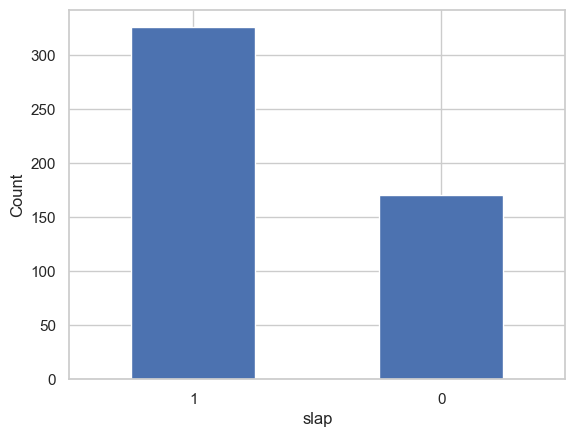

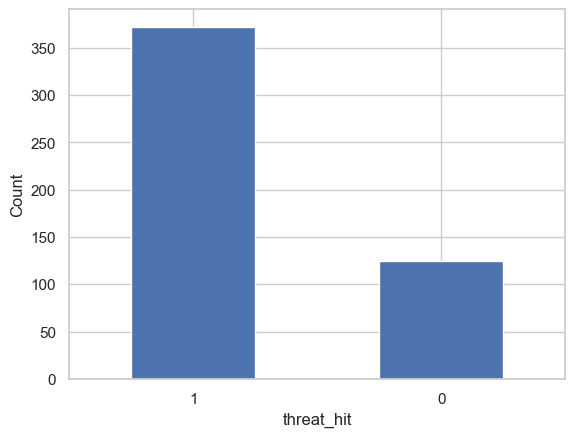

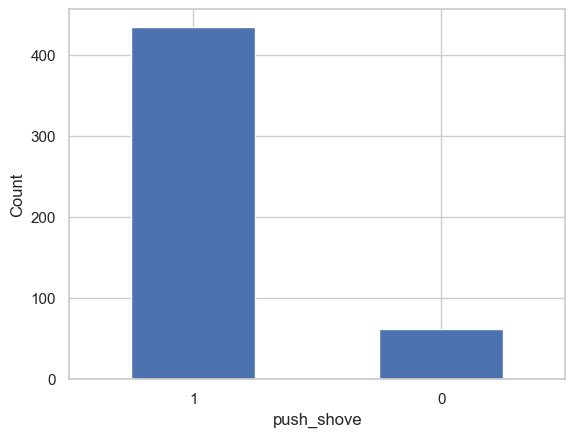

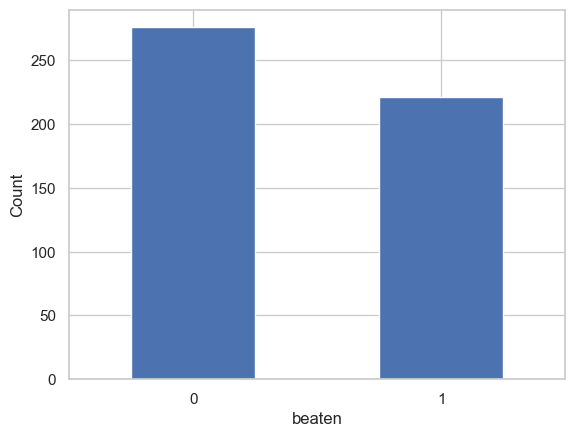

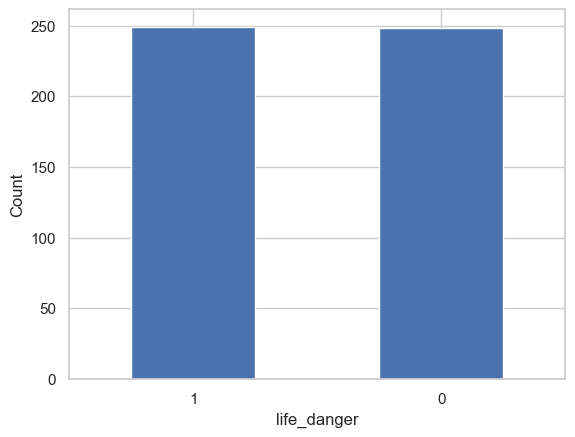

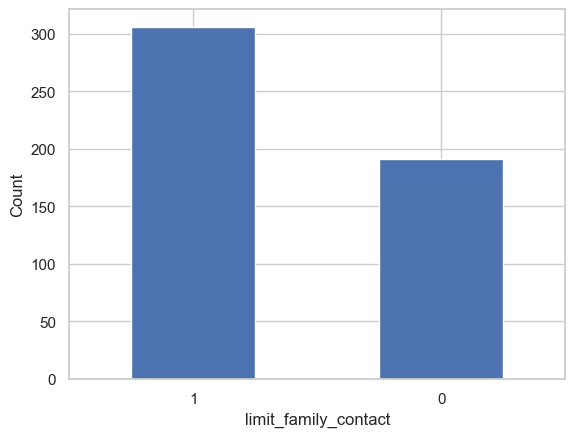

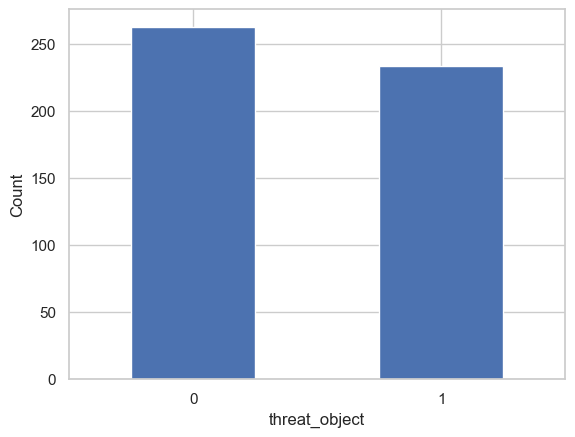

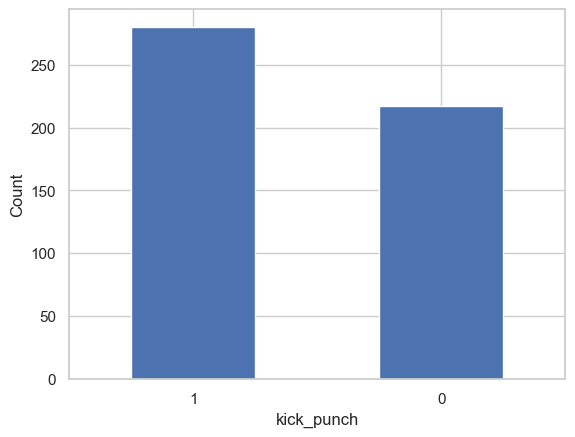

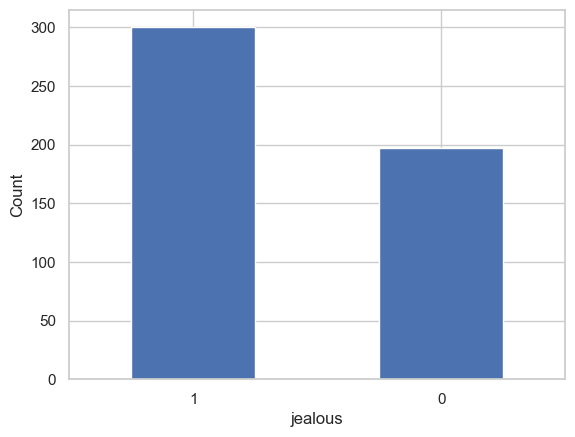

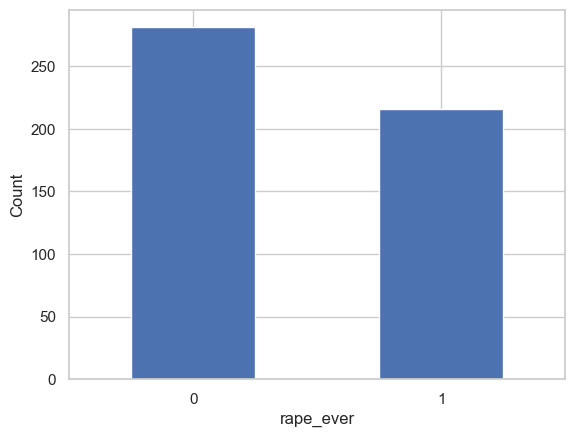

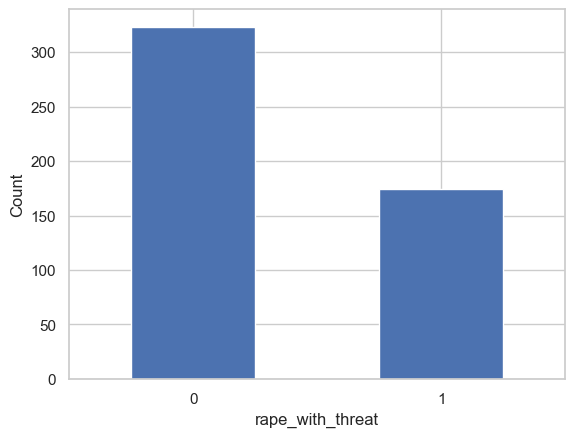

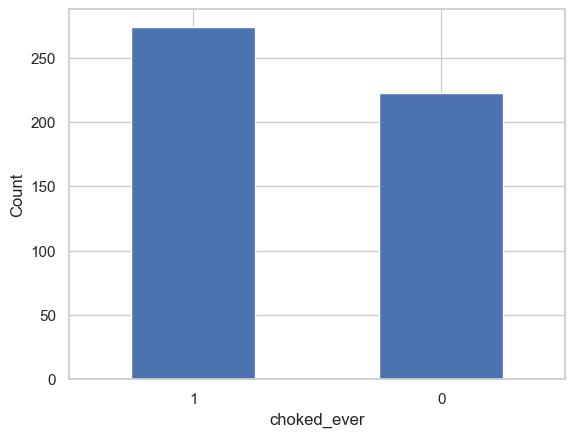

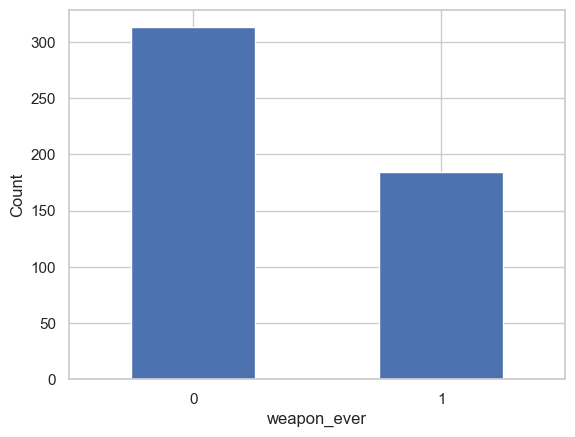

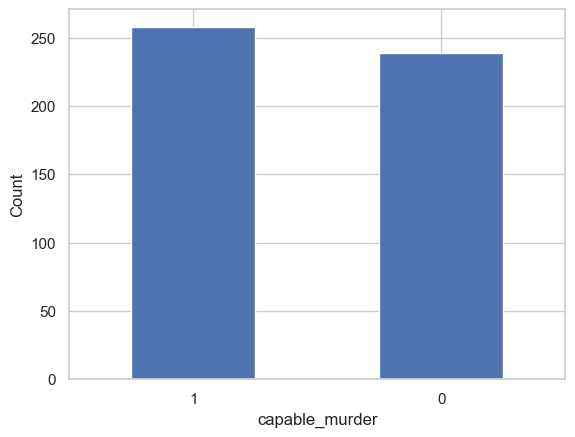

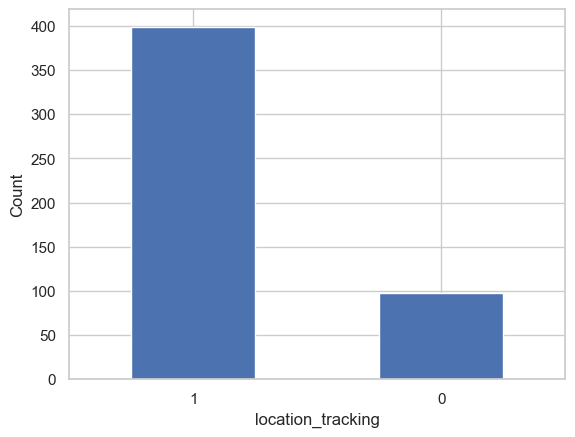

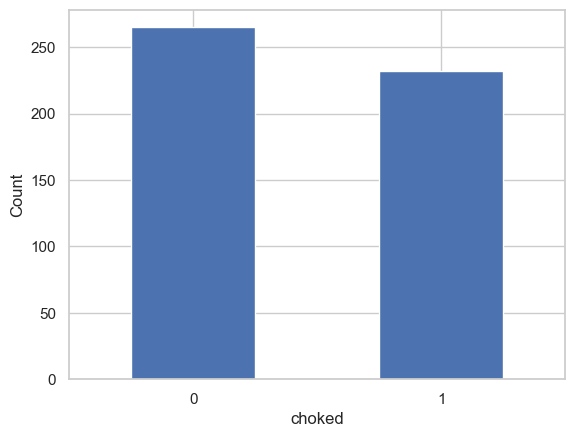

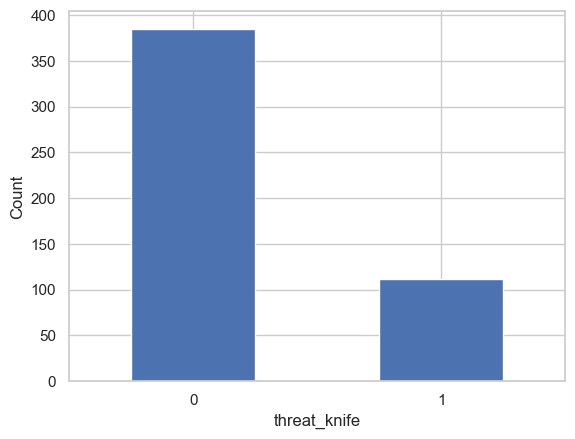

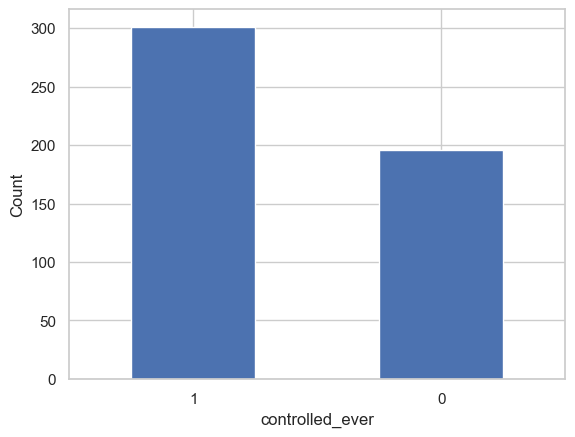

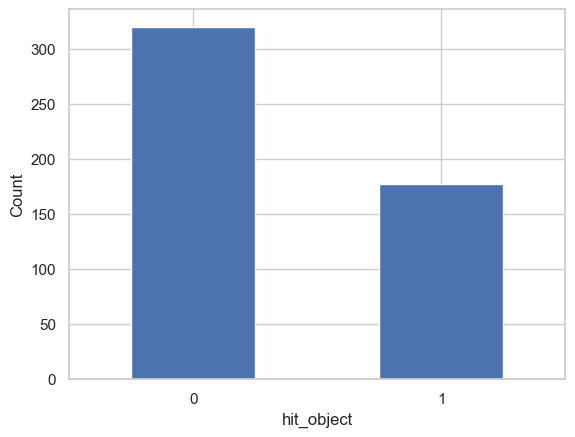

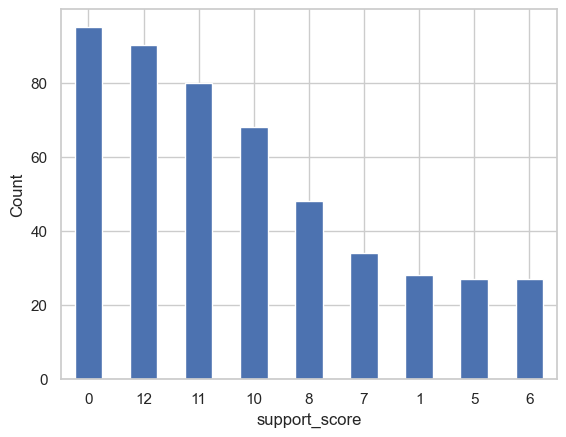

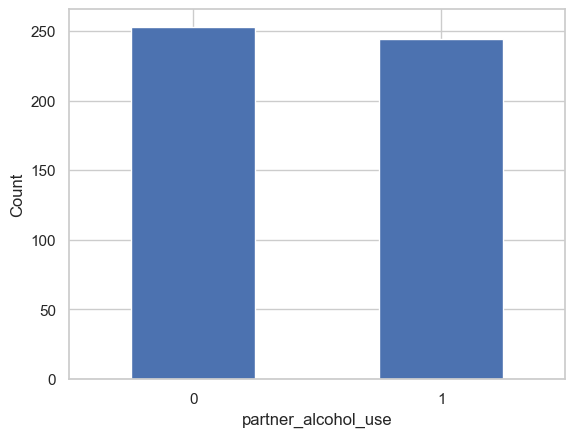

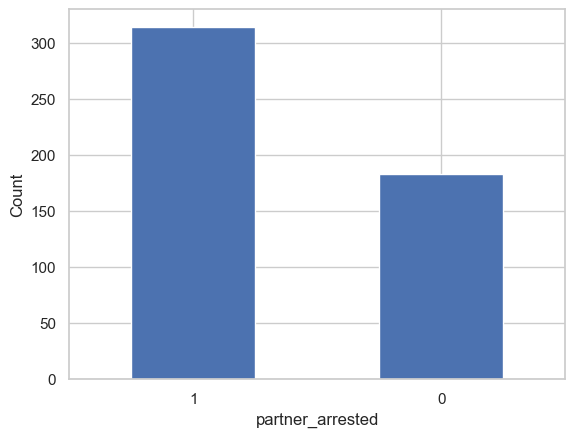

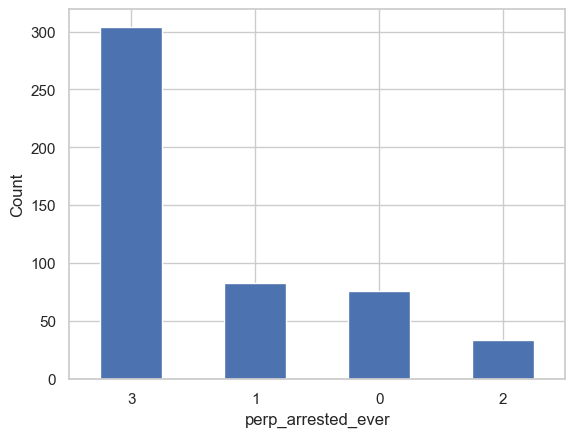

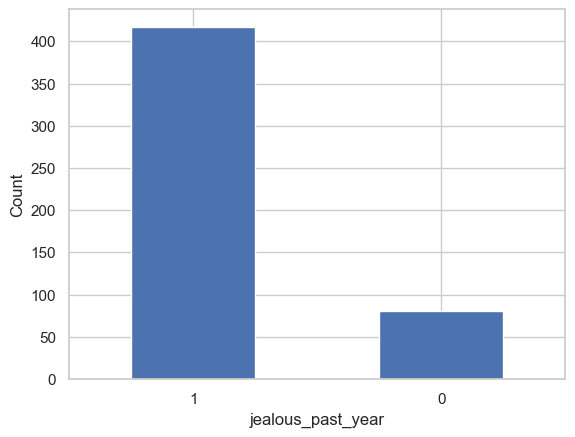

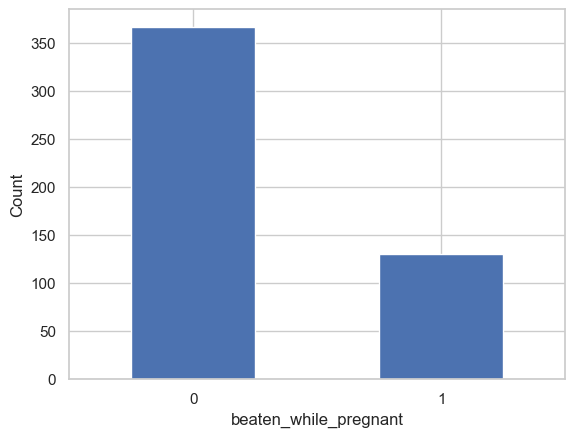

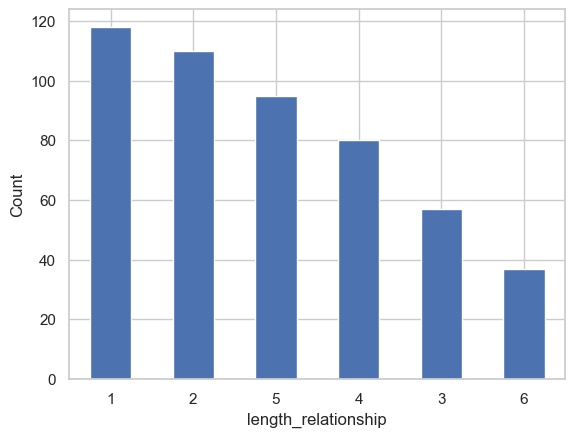

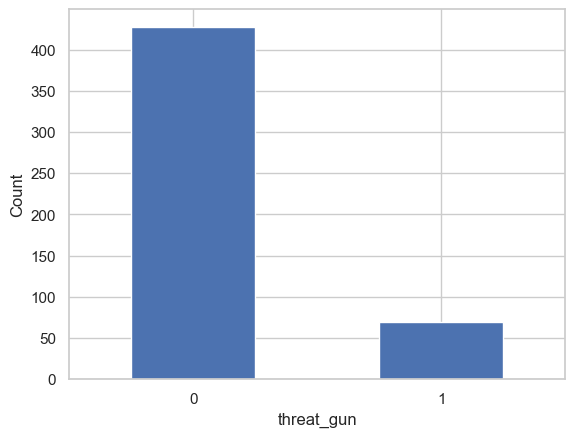

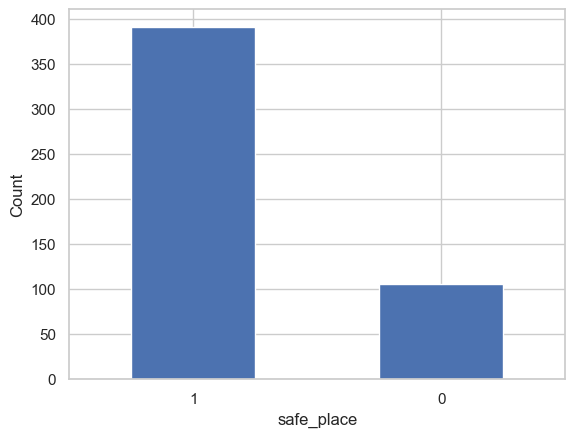

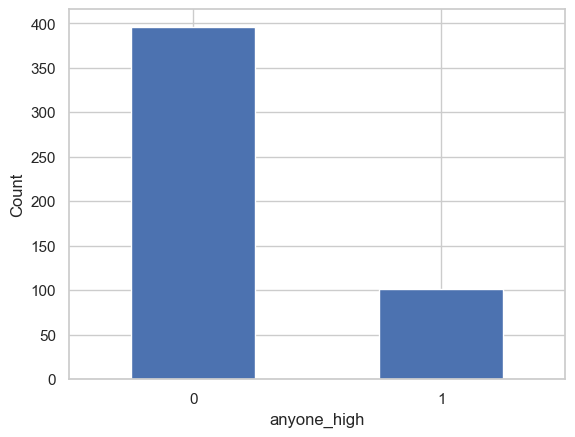

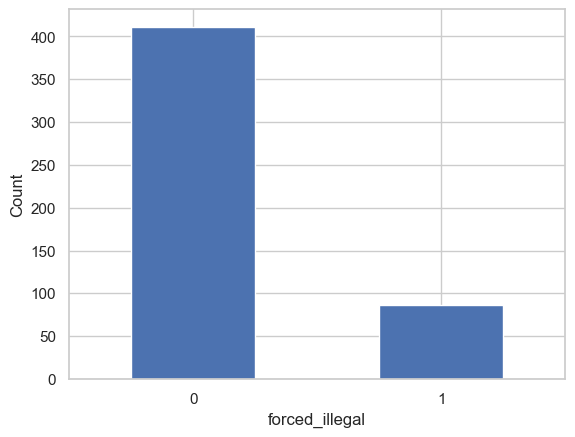

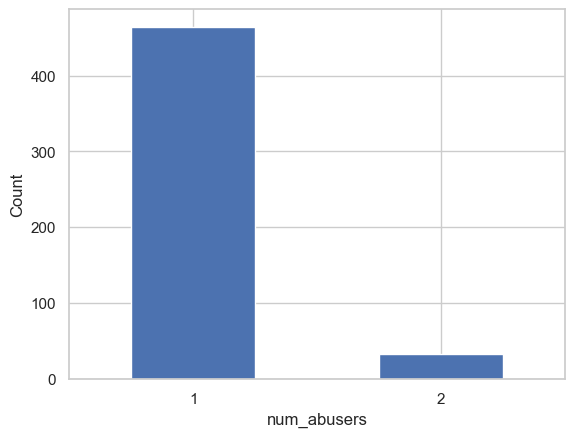

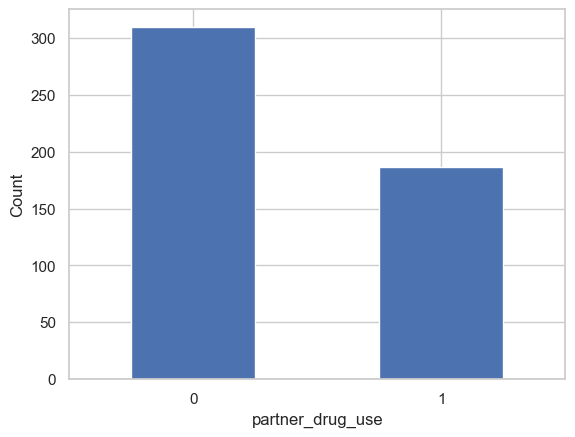

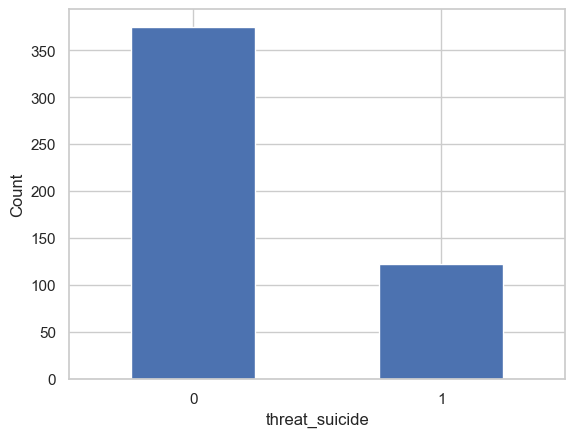

In [30]:
explore.make_bars(df, features)

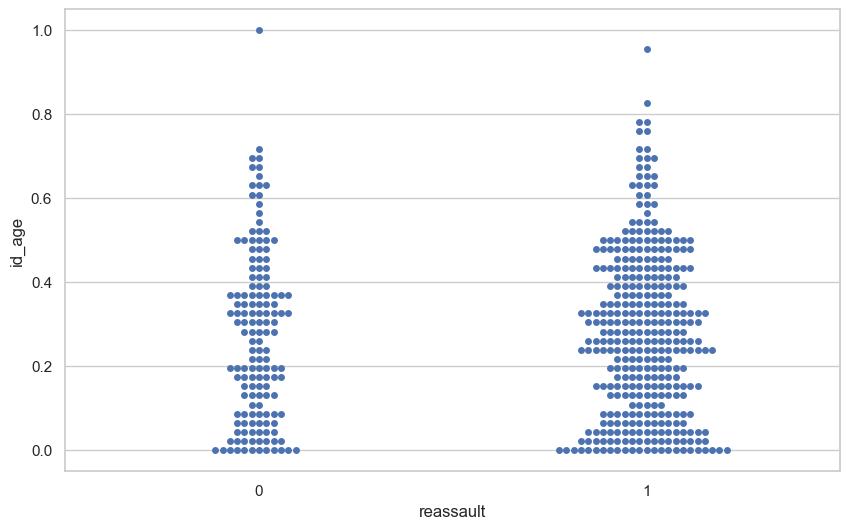

In [31]:
explore.swarrrm(df, 'reassault', ['id_age'])

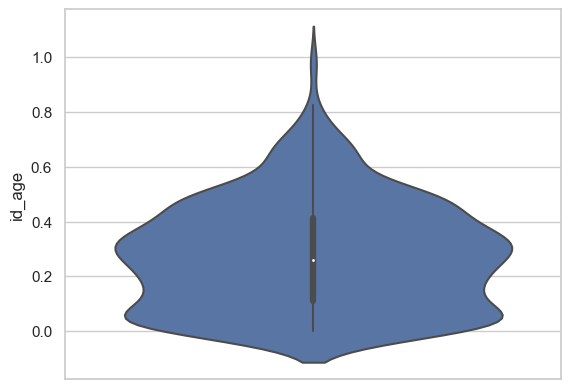

In [32]:
explore.make_violin1(df, ['id_age'])

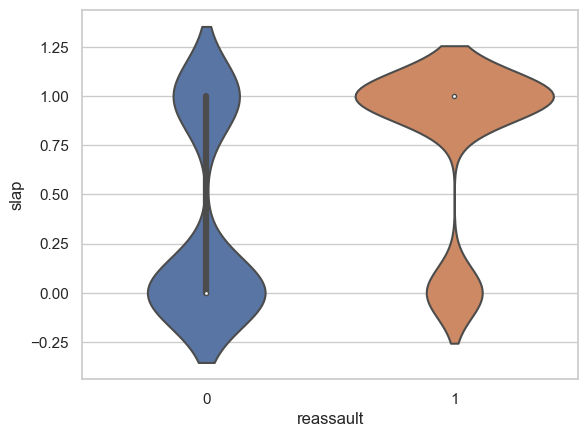

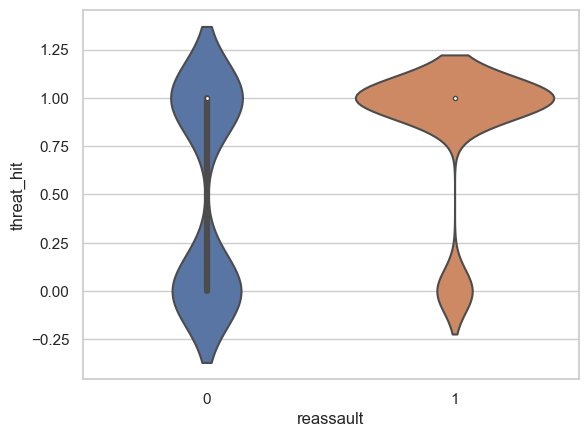

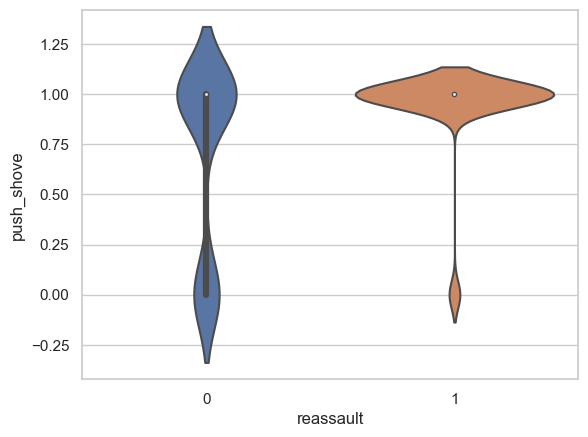

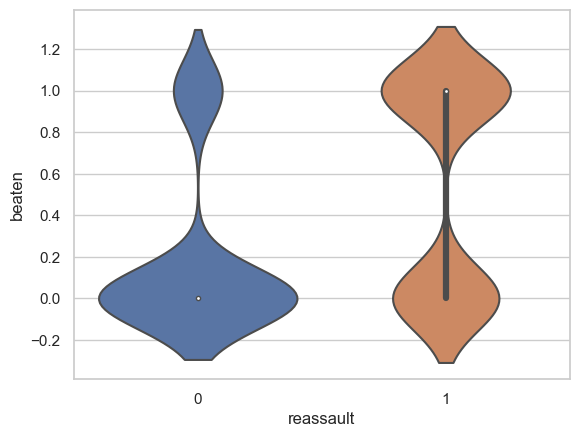

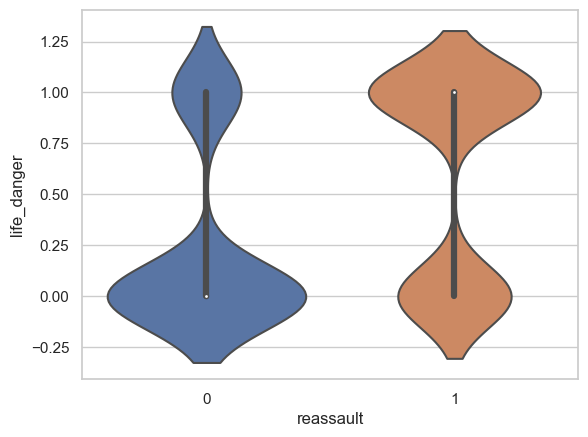

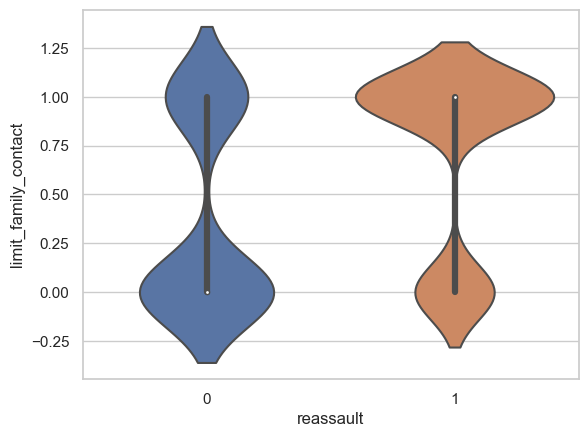

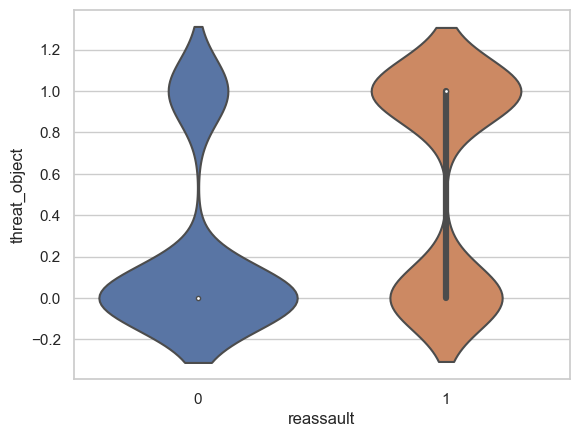

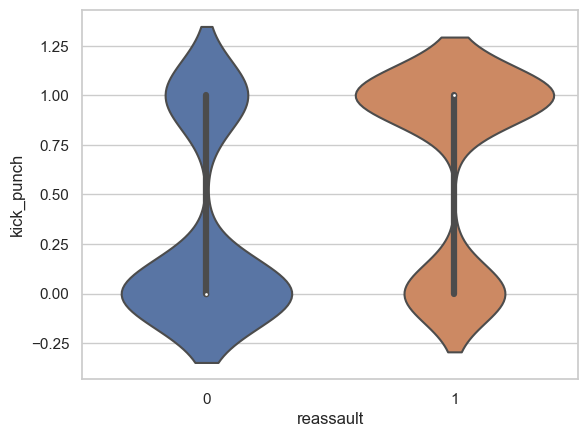

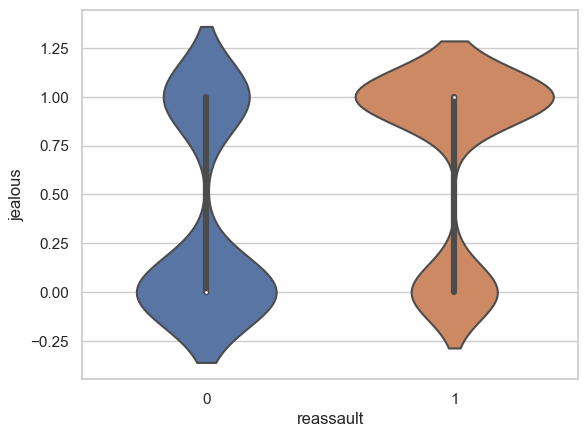

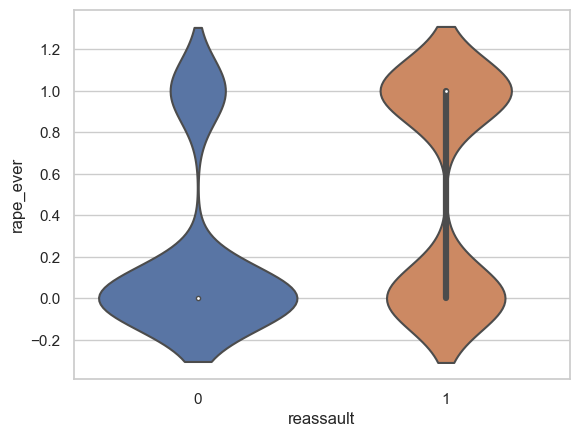

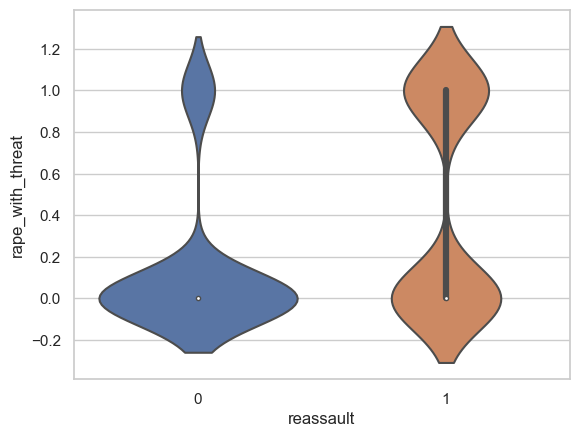

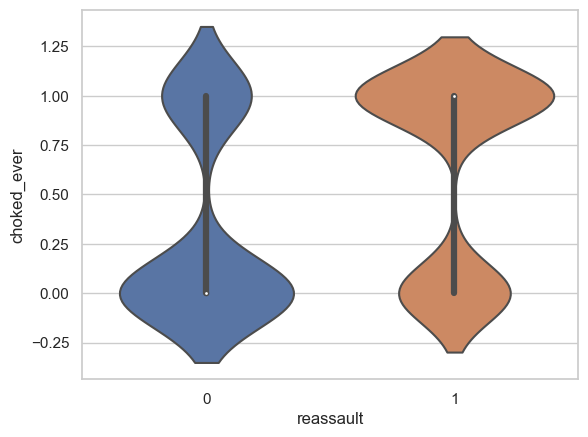

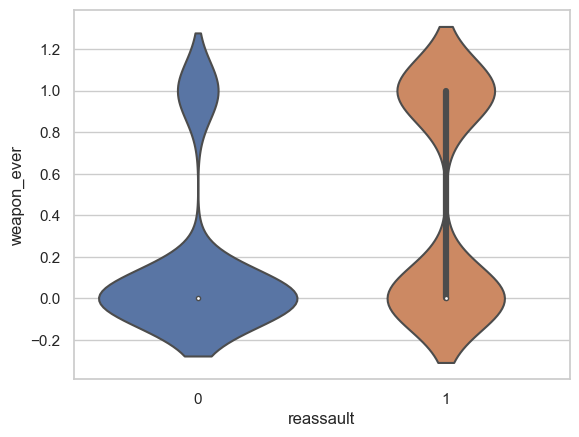

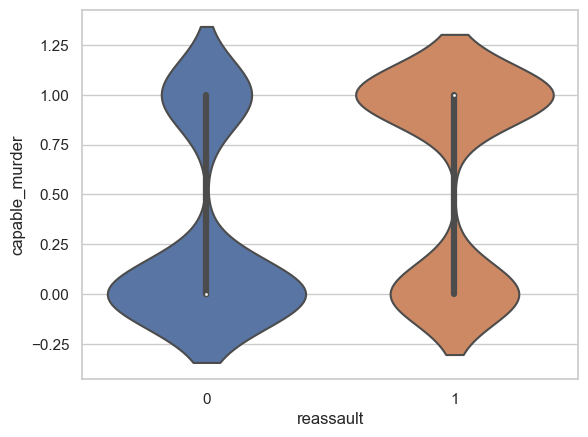

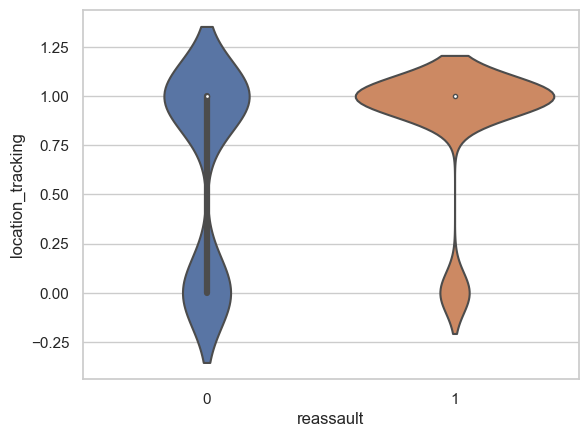

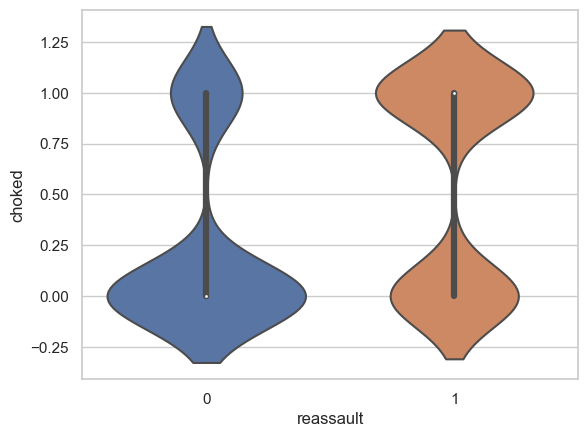

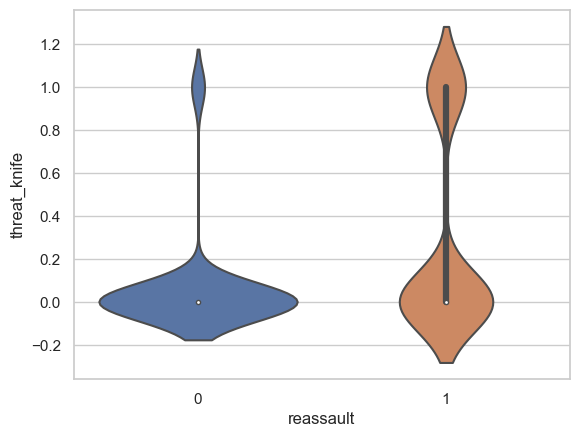

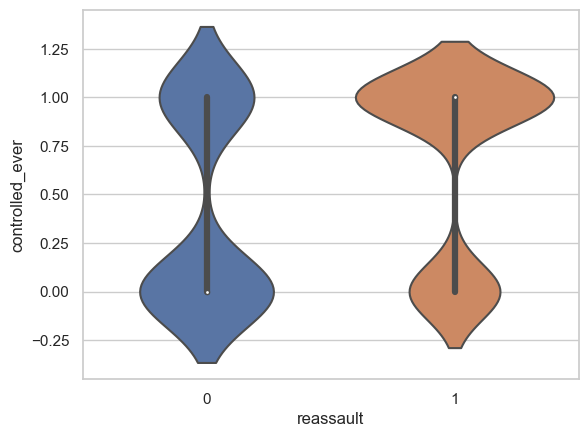

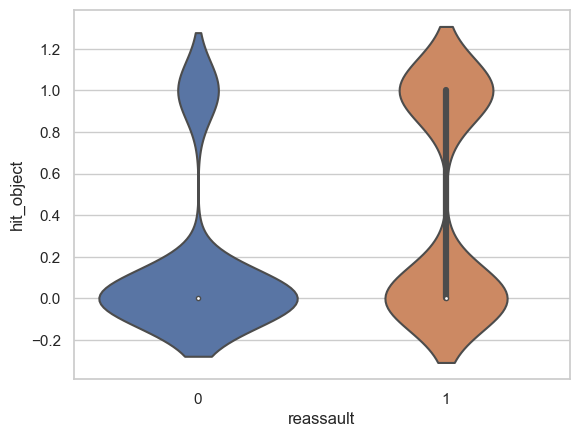

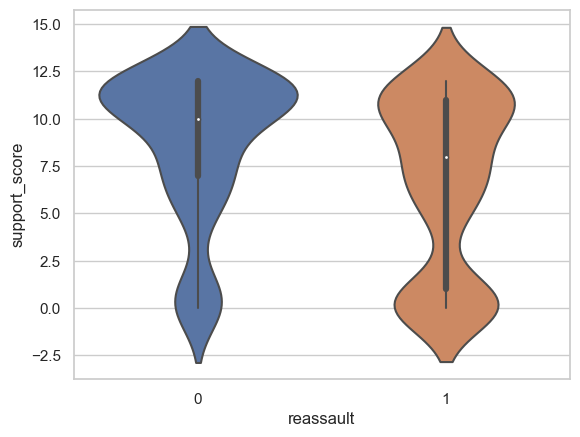

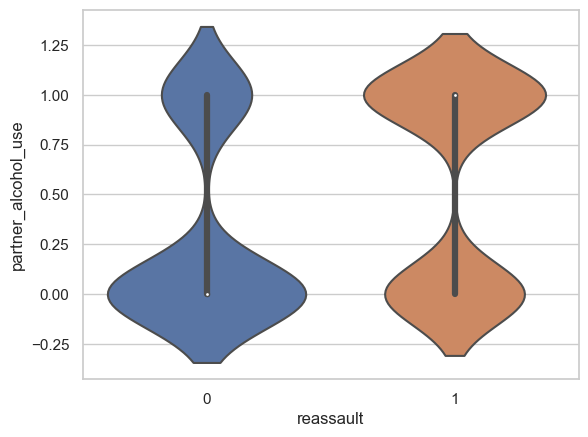

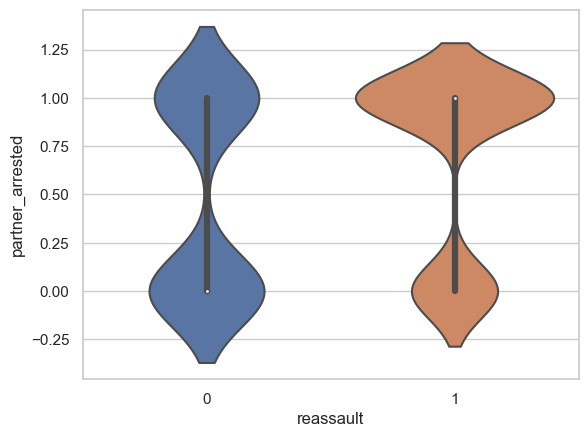

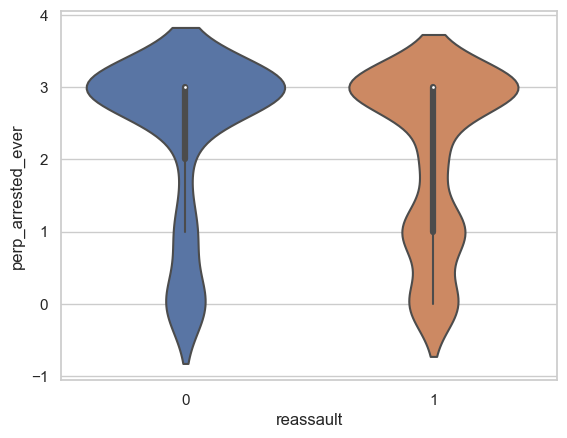

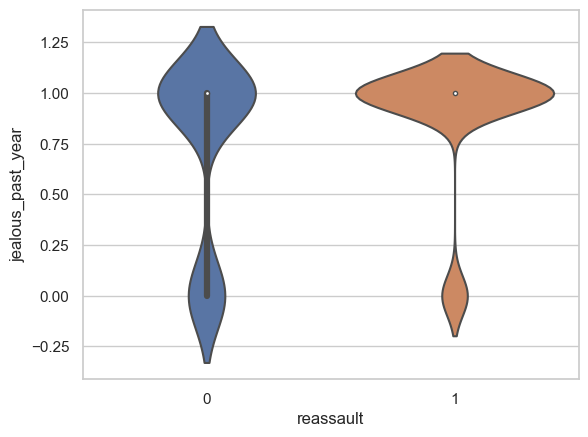

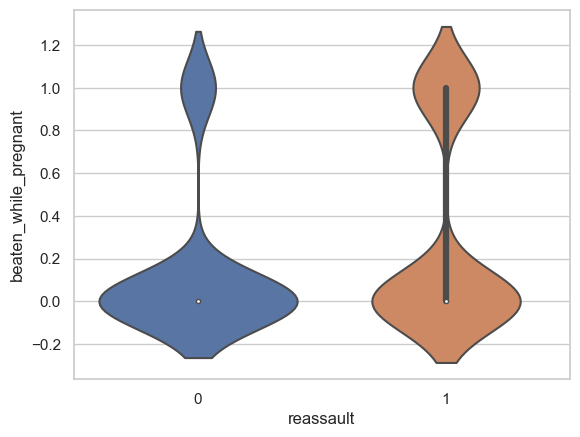

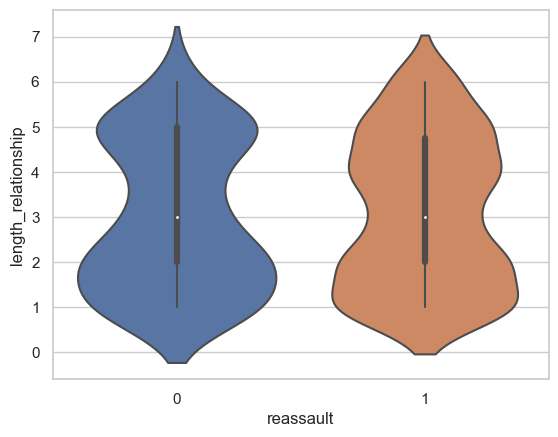

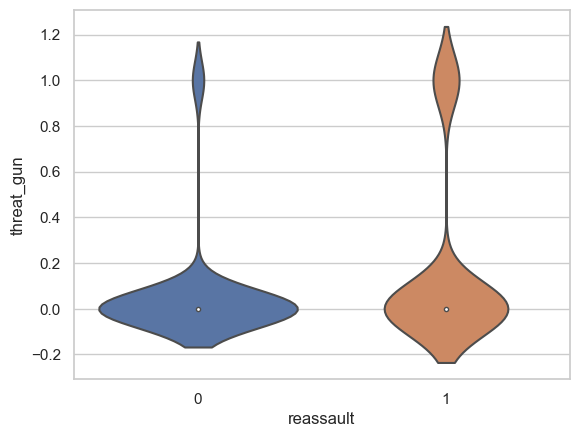

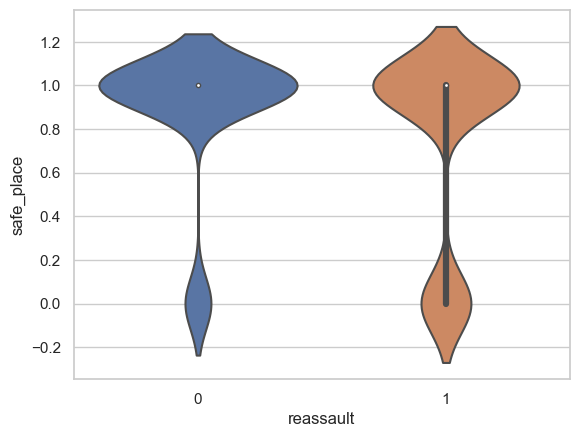

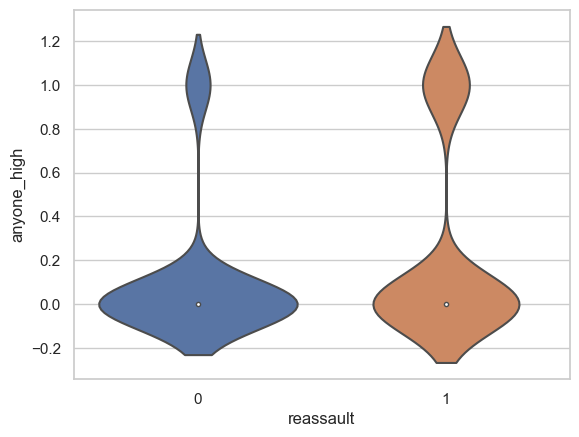

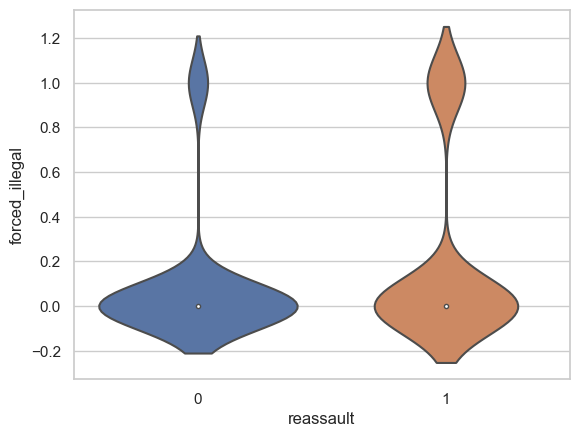

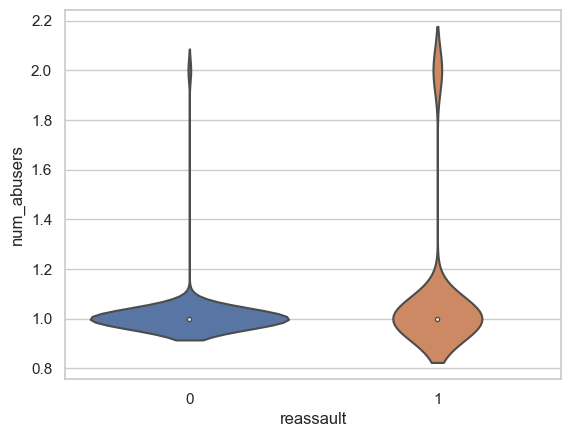

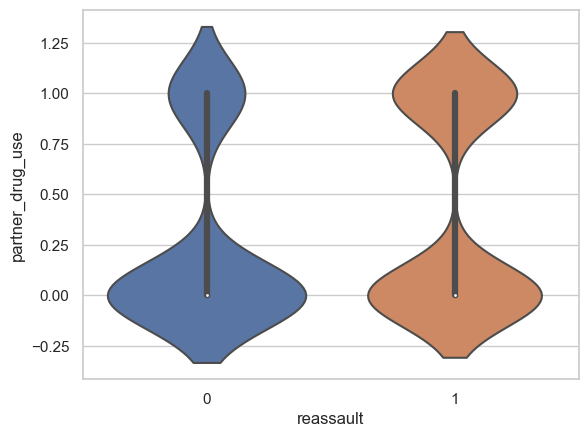

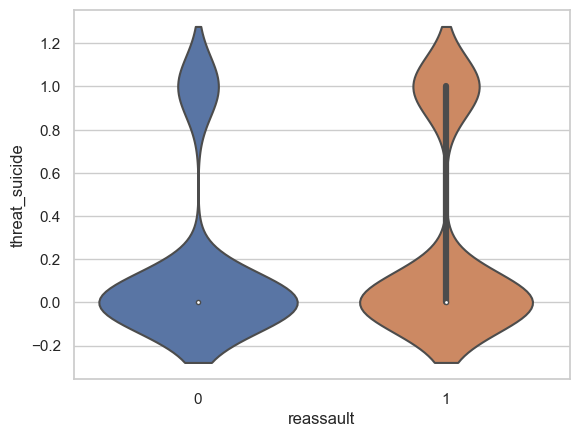

In [33]:
explore.make_violin2(df, "reassault", features)

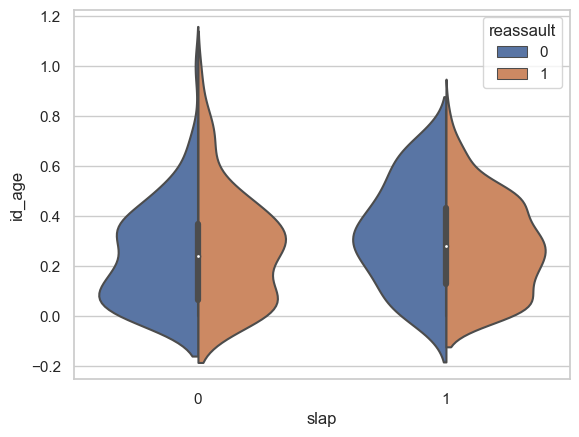

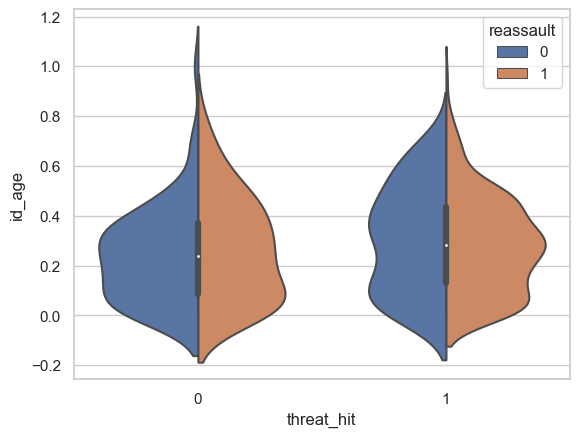

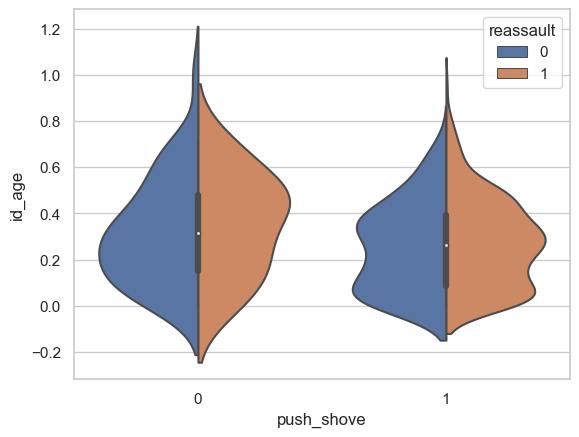

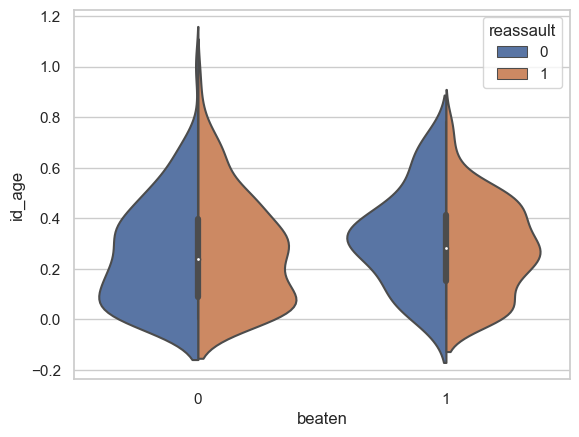

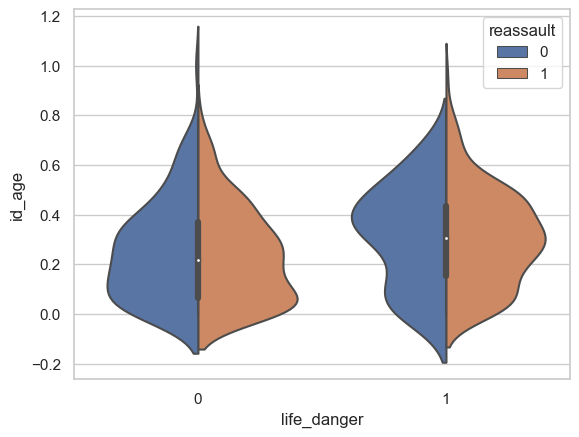

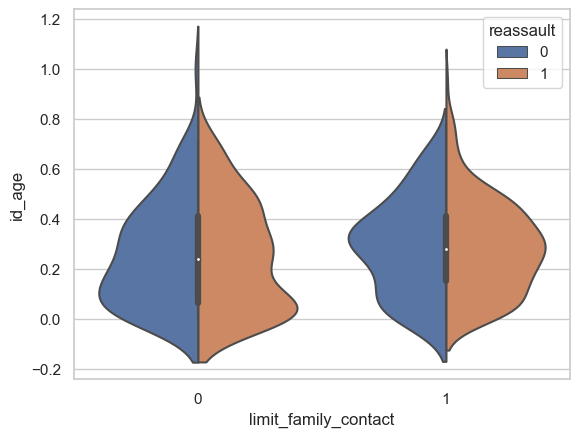

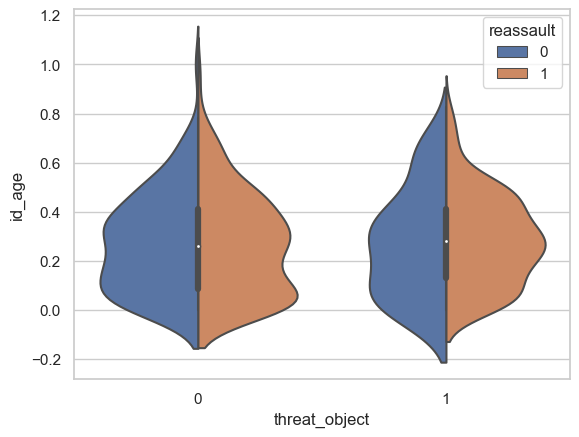

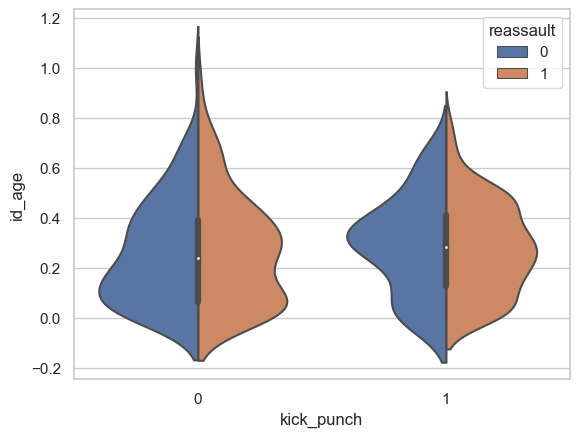

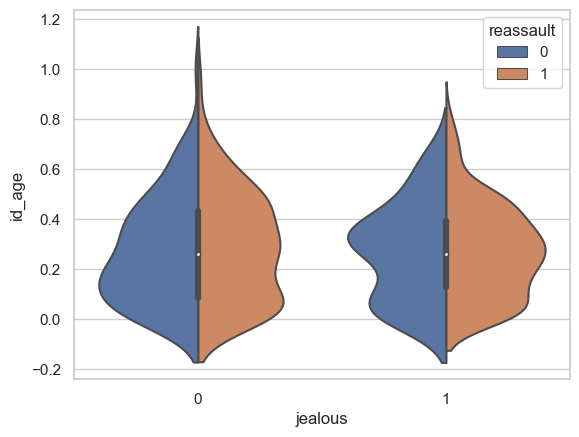

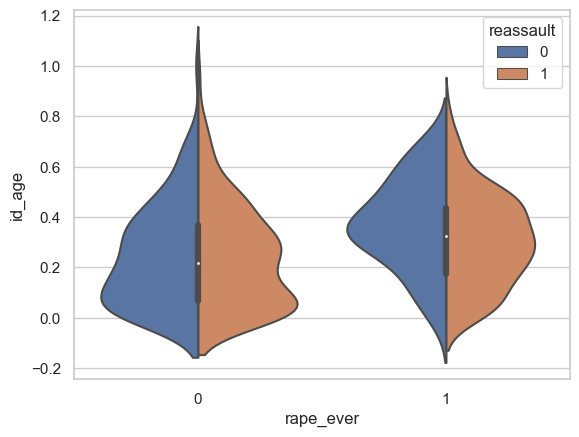

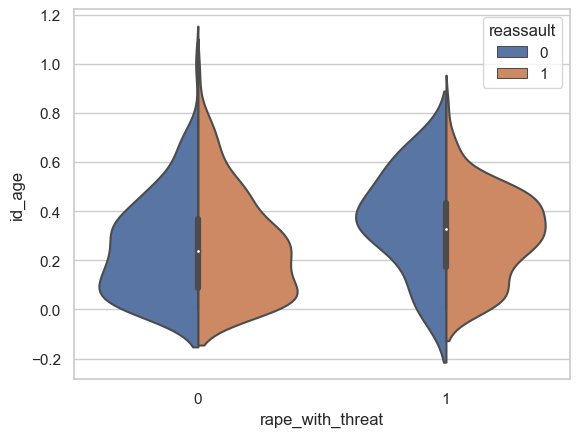

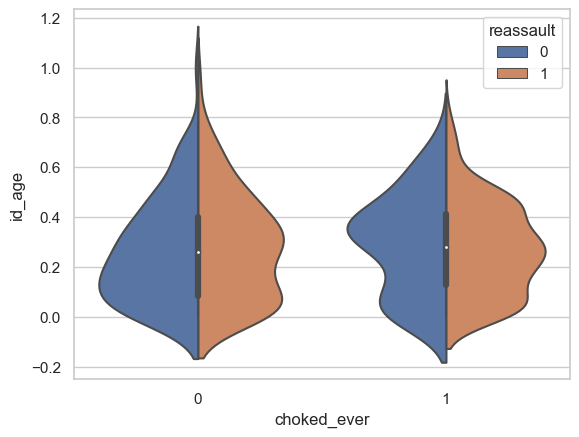

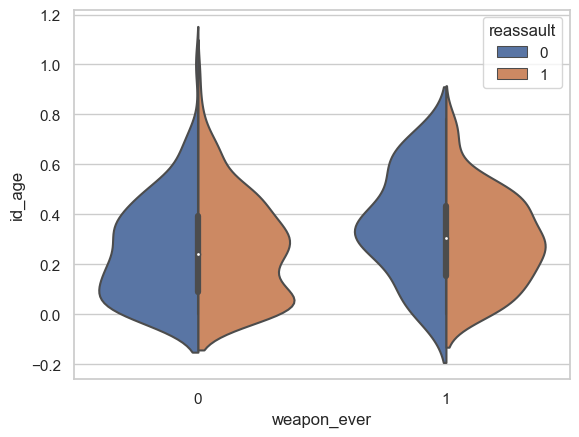

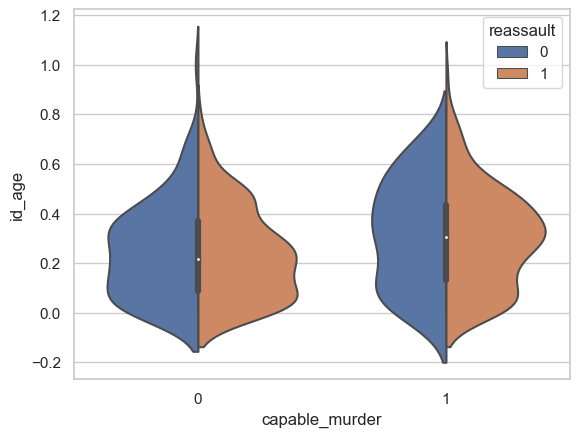

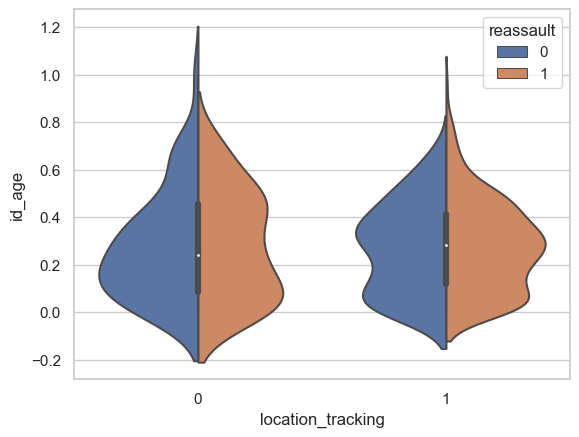

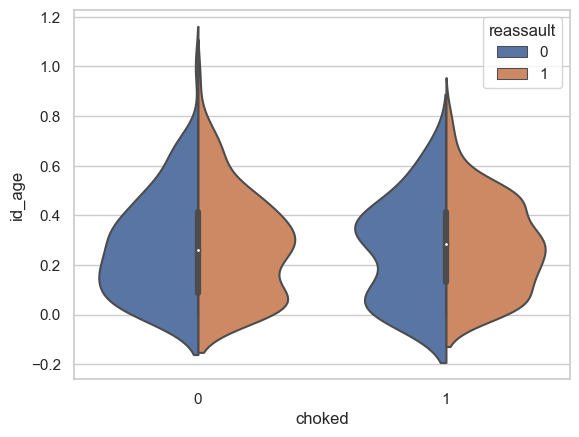

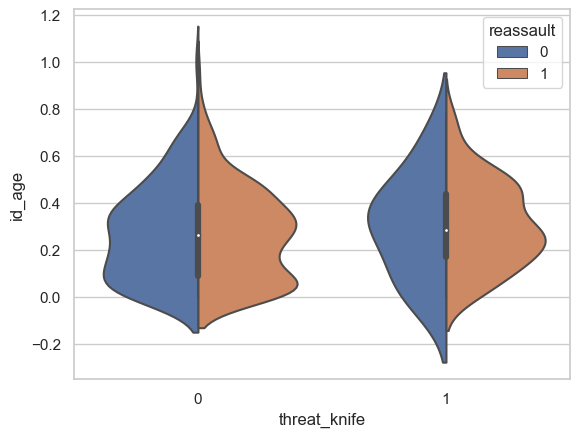

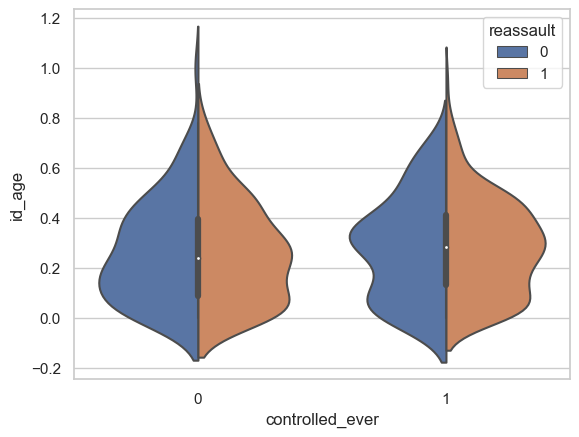

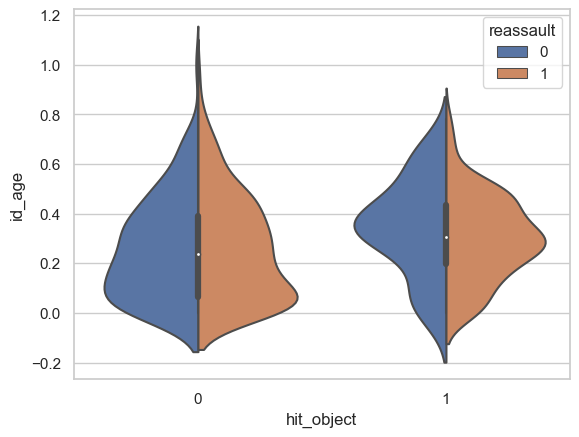

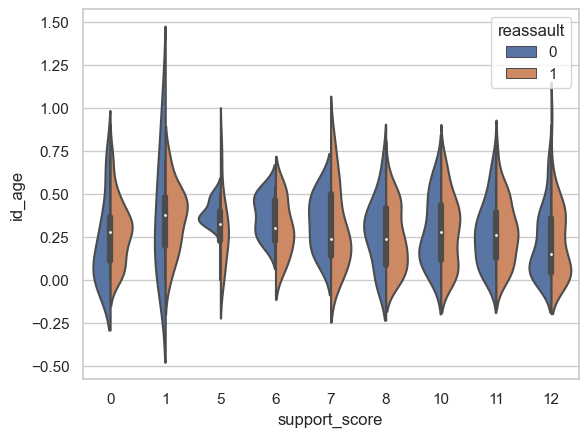

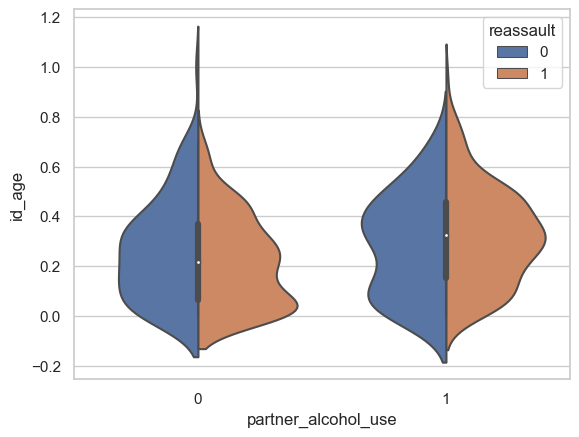

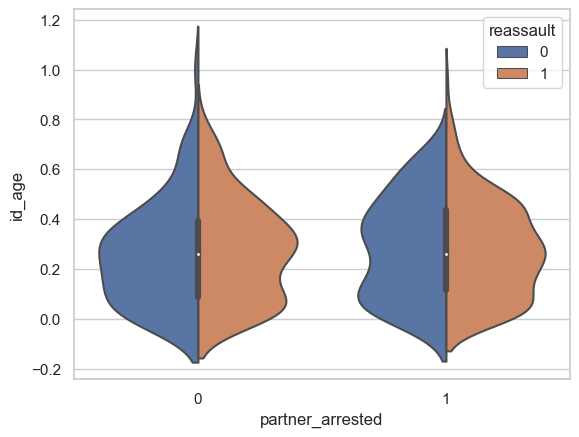

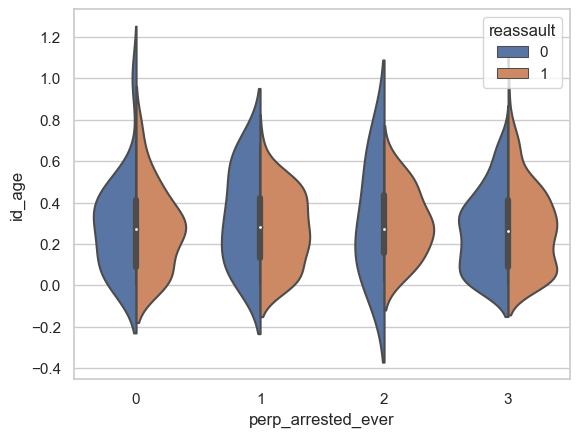

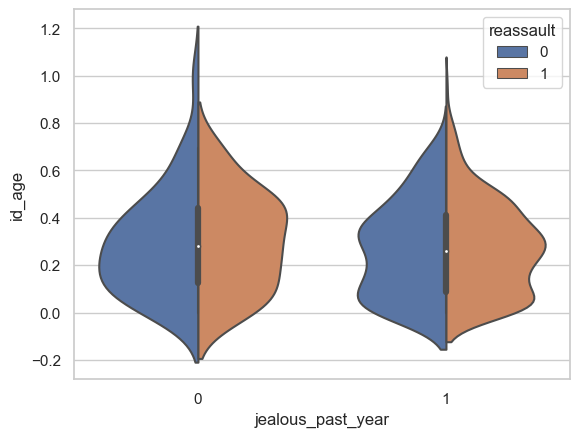

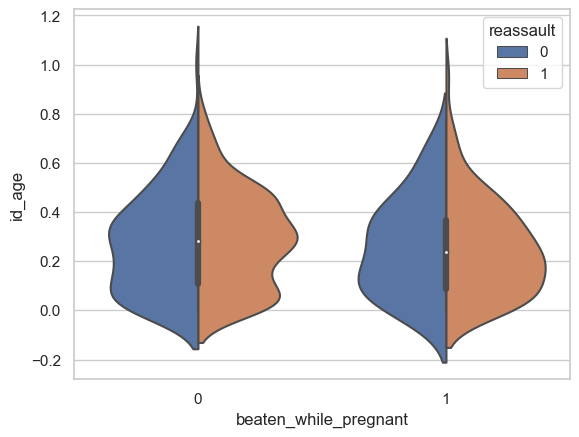

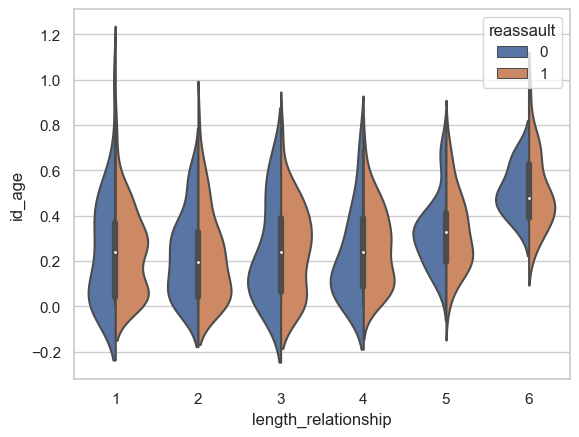

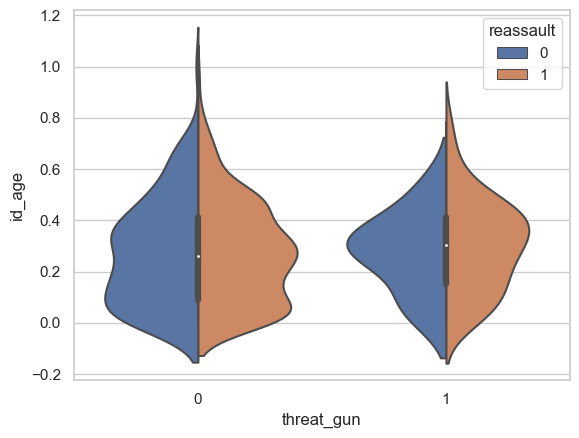

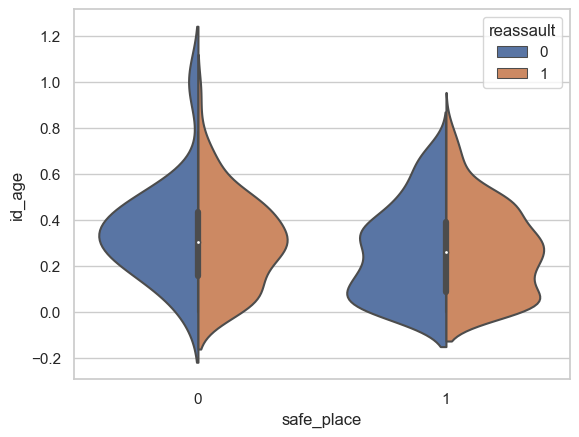

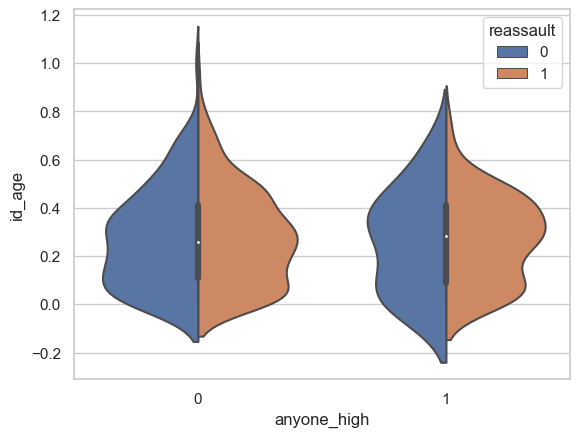

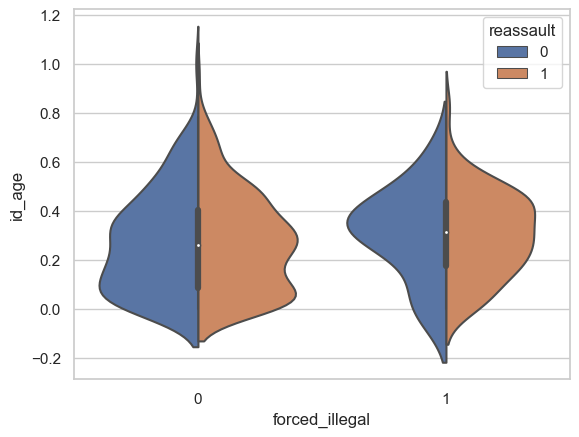

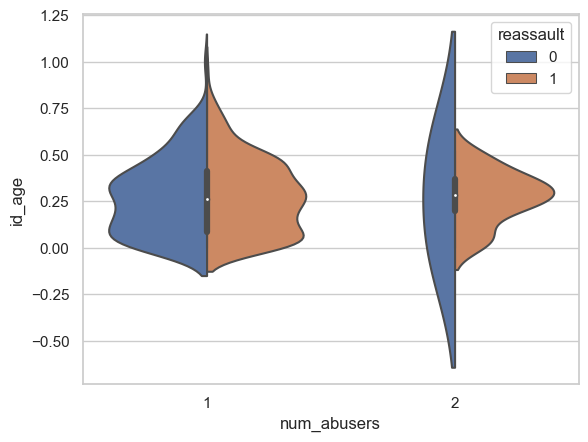

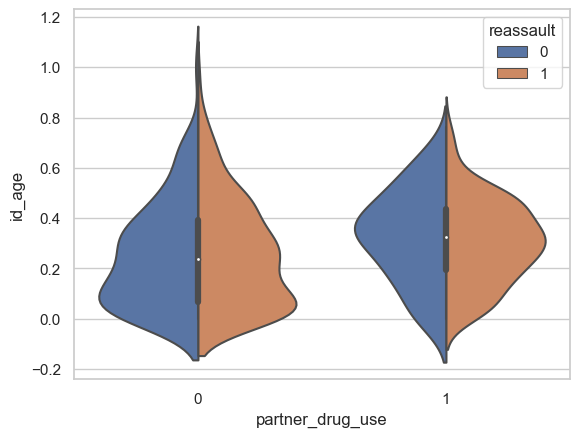

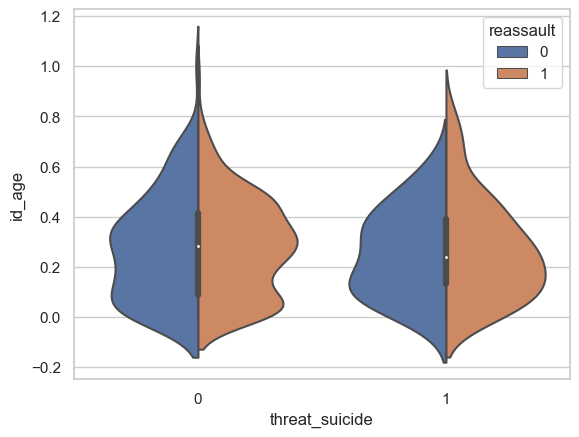

In [34]:
explore.make_violin3(df, features, "id_age", "reassault")

### Dummy variables

In [35]:
# Find which feature(s) has more than 2 values
dummies = []
for feature in features:
    if df[feature].nunique() > 2:
        dummies.append(feature)
        print(feature)

support_score
perp_arrested_ever
length_relationship


In [36]:
cat_vars = dummies
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
cat_vars = dummies
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [37]:
df.head()
df.tail()
df.shape

,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,guns_in_home,jealous_past_year,limit_family_contact,location_tracking,threat_hit,threat_object,push_shove,slap,kick_punch,hit_object,beaten,choked,threat_knife,threat_gun,rape_with_threat,power_scale,harass_scale,id_age,age_disparity,children_not_partner,same_sex_relationship,partner_drug_use,partner_alcohol_use,threat_suicide,partner_reported_child_abuse,partner_arrested,violence_increased,severity_increased,weapon_ever,choked_ever,rape_ever,controlled_ever,jealous,capable_murder,reassault,gun_fired,anyone_high,safe_place,forced_illegal,life_danger,talk_about_it,left_or_not,medical_staff_helpful,perp_arrested_ever,police_resp,order_protection,level_severity,num_incidents,num_threats,num_slapping,num_punching,num_beating,num_weapon,num_forced_sex,miscarriage_resulted,restrained_by_perp,num_choked,num_perp_drunk,num_woman_drunk,num_both_drunk,num_perp_drugs,num_woman_drugs,num_both_drugs,support_score_0,support_score_1,support_score_5,support_score_6,support_score_7,support_score_8,support_score_10,support_score_11,support_score_12,perp_arrested_ever_0,perp_arrested_ever_1,perp_arrested_ever_2,perp_arrested_ever_3,length_relationship_1,length_relationship_2,length_relationship_3,length_relationship_4,length_relationship_5,length_relationship_6
0,108395,1,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,2,3,0.000000,-1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,3,777,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,108397,1,1,2,1,1,0,0,0,11,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,2,5,0.260870,-1,2,0,0,1,0,0,1,0,1,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,3,777,0,2,2,0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
2,108399,1,1,5,1,1,2,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,3,2,0.195652,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,3,777,0,2,2,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,108443,1,1,2,1,1,0,1,0,12,0,1,0,1,1,1,1,1,0,1,0,1,0,0,0,3,5,0.021739,0,2,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,1,0,3,777,0,2,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,108444,1,1,2,1,1,1,0,0,11,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,2,3,0.000000,0,5,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,3,777,0,1,3,0,3,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0


,id,abuse_past_year,abuse_status,length_relationship,partner_abusive,num_abusers,num_children,pregnant,beaten_while_pregnant,support_score,guns_in_home,jealous_past_year,limit_family_contact,location_tracking,threat_hit,threat_object,push_shove,slap,kick_punch,hit_object,beaten,choked,threat_knife,threat_gun,rape_with_threat,power_scale,harass_scale,id_age,age_disparity,children_not_partner,same_sex_relationship,partner_drug_use,partner_alcohol_use,threat_suicide,partner_reported_child_abuse,partner_arrested,violence_increased,severity_increased,weapon_ever,choked_ever,rape_ever,controlled_ever,jealous,capable_murder,reassault,gun_fired,anyone_high,safe_place,forced_illegal,life_danger,talk_about_it,left_or_not,medical_staff_helpful,perp_arrested_ever,police_resp,order_protection,level_severity,num_incidents,num_threats,num_slapping,num_punching,num_beating,num_weapon,num_forced_sex,miscarriage_resulted,restrained_by_perp,num_choked,num_perp_drunk,num_woman_drunk,num_both_drunk,num_perp_drugs,num_woman_drugs,num_both_drugs,support_score_0,support_score_1,support_score_5,support_score_6,support_score_7,support_score_8,support_score_10,support_score_11,support_score_12,perp_arrested_ever_0,perp_arrested_ever_1,perp_arrested_ever_2,perp_arrested_ever_3,length_relationship_1,length_relationship_2,length_relationship_3,length_relationship_4,length_relationship_5,length_relationship_6
492,808678,1,0,4,1,1,1,0,0,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.173913,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,6,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
493,808695,1,0,5,1,1,2,0,1,8,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,4,9,0.195652,0,1,0,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,1,8,1,2,4,4,3,0,1,0,4,0,1,0,0,0,0,28,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
494,808696,1,1,5,1,1,2,0,1,8,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,4,7,0.239130,0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,1,1,0,1,1,1,0,3,777,0,2,4,4,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
495,908001,1,1,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.021739,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
496,908003,1,1,4,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.369565,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


(497, 92)

In [38]:
features

['slap',
 'threat_hit',
 'push_shove',
 'beaten',
 'life_danger',
 'limit_family_contact',
 'threat_object',
 'kick_punch',
 'jealous',
 'rape_ever',
 'rape_with_threat',
 'choked_ever',
 'weapon_ever',
 'capable_murder',
 'location_tracking',
 'choked',
 'threat_knife',
 'controlled_ever',
 'hit_object',
 'support_score',
 'partner_alcohol_use',
 'partner_arrested',
 'perp_arrested_ever',
 'jealous_past_year',
 'beaten_while_pregnant',
 'length_relationship',
 'threat_gun',
 'safe_place',
 'anyone_high',
 'forced_illegal',
 'num_abusers',
 'partner_drug_use',
 'threat_suicide']

## // MODELING WITH LOGISTIC REGRESSION

In [39]:
df.columns.values

array(['id', 'abuse_past_year', 'abuse_status', 'length_relationship',
       'partner_abusive', 'num_abusers', 'num_children', 'pregnant',
       'beaten_while_pregnant', 'support_score', 'guns_in_home',
       'jealous_past_year', 'limit_family_contact', 'location_tracking',
       'threat_hit', 'threat_object', 'push_shove', 'slap', 'kick_punch',
       'hit_object', 'beaten', 'choked', 'threat_knife', 'threat_gun',
       'rape_with_threat', 'power_scale', 'harass_scale', 'id_age',
       'age_disparity', 'children_not_partner', 'same_sex_relationship',
       'partner_drug_use', 'partner_alcohol_use', 'threat_suicide',
       'partner_reported_child_abuse', 'partner_arrested',
       'violence_increased', 'severity_increased', 'weapon_ever',
       'choked_ever', 'rape_ever', 'controlled_ever', 'jealous',
       'capable_murder', 'reassault', 'gun_fired', 'anyone_high',
       'safe_place', 'forced_illegal', 'life_danger', 'talk_about_it',
       'left_or_not', 'medical_staff_help

### Oversampling using SMOTE

In [40]:
X = df.loc[:, df.columns != 'reassault']
y = df.loc[:, df.columns == 'reassault']

os = SMOTE(random_state=493)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns

os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data = os_data_X,columns = columns )
os_data_y = pd.DataFrame(data = os_data_y,columns = ['reassault'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['reassault']==0]))
print("Number of subscription",len(os_data_y[os_data_y['reassault']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['reassault']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['reassault']==1])/len(os_data_X))

length of oversampled data is  478
Number of no subscription in oversampled data 239
Number of subscription 239
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


### Create a list of features to be incrementally increased for each run

In [41]:
# create list of lists that increase number of features in list
that_list = []
list_of_feature_lists = []
for i in range(1,len(features)):
    that_list = features[0:i]
    list_of_feature_lists.append(that_list)

### Determine the efficacy of the models

In [42]:
# loop to identify efficacy of models
for list_item in list_of_feature_lists:
    clf, y_pred, y_pred_proba = model.log_reg(list_item, X_train, y_train, solver='liblinear')
    print('--------------------------------------------------------')
    print(f'Model based on top {len(list_item)} features')
    print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(clf.score(X_train[list_item], y_train)))
    print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred))
    print('--------------------------------------------------------')

Cross Validation Results: 
[0.75714286 0.77142857 0.66666667 0.75362319 0.69565217]
--------------------------------------------------------
Model based on top 1 features
Accuracy of Logistic Regression classifier on training set: 0.73
[[ 69  39]
 [ 55 184]]
              precision    recall  f1-score   support

           0       0.56      0.64      0.59       108
           1       0.83      0.77      0.80       239

    accuracy                           0.73       347
   macro avg       0.69      0.70      0.70       347
weighted avg       0.74      0.73      0.73       347

--------------------------------------------------------
Cross Validation Results: 
[0.74285714 0.77142857 0.73913043 0.71014493 0.79710145]
--------------------------------------------------------
Model based on top 2 features
Accuracy of Logistic Regression classifier on training set: 0.75
[[ 40  68]
 [ 18 221]]
              precision    recall  f1-score   support

           0       0.69      0.37      0.48

[0.78571429 0.81428571 0.76811594 0.76811594 0.69565217]
--------------------------------------------------------
Model based on top 14 features
Accuracy of Logistic Regression classifier on training set: 0.79
[[ 59  49]
 [ 24 215]]
              precision    recall  f1-score   support

           0       0.71      0.55      0.62       108
           1       0.81      0.90      0.85       239

    accuracy                           0.79       347
   macro avg       0.76      0.72      0.74       347
weighted avg       0.78      0.79      0.78       347

--------------------------------------------------------
Cross Validation Results: 
[0.75714286 0.81428571 0.72463768 0.7826087  0.71014493]
--------------------------------------------------------
Model based on top 15 features
Accuracy of Logistic Regression classifier on training set: 0.79
[[ 62  46]
 [ 27 212]]
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       108
           1  

[0.78571429 0.77142857 0.76811594 0.75362319 0.75362319]
--------------------------------------------------------
Model based on top 27 features
Accuracy of Logistic Regression classifier on training set: 0.79
[[ 57  51]
 [ 22 217]]
              precision    recall  f1-score   support

           0       0.72      0.53      0.61       108
           1       0.81      0.91      0.86       239

    accuracy                           0.79       347
   macro avg       0.77      0.72      0.73       347
weighted avg       0.78      0.79      0.78       347

--------------------------------------------------------
Cross Validation Results: 
[0.74285714 0.78571429 0.76811594 0.76811594 0.75362319]
--------------------------------------------------------
Model based on top 28 features
Accuracy of Logistic Regression classifier on training set: 0.79
[[ 58  50]
 [ 22 217]]
              precision    recall  f1-score   support

           0       0.72      0.54      0.62       108
           1  

### Select the number of features that produced the best model

In [43]:
clf, y_pred, y_pred_proba = model.log_reg(features[:8], X_train, y_train, solver='liblinear')

Cross Validation Results: 
[0.77142857 0.8        0.72463768 0.79710145 0.79710145]


### Implementing the model

In [44]:
clf.fit(X_test[features[:8]], y_test)
y_pred = clf.predict(X_test[features[:8]])
y_pred_proba = clf.predict_proba(X_test[features[:8]])
print('Accuracy of logreg classifier on test set: {:.2f}'
     .format(clf.score(X_test[features[:8]], y_test)))

LogisticRegressionCV(cv=5, random_state=0, solver='liblinear')

Accuracy of logreg classifier on test set: 0.83


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.51      0.61        39
           1       0.85      0.94      0.89       111

    accuracy                           0.83       150
   macro avg       0.79      0.72      0.75       150
weighted avg       0.82      0.83      0.82       150



### ROC AUC

<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

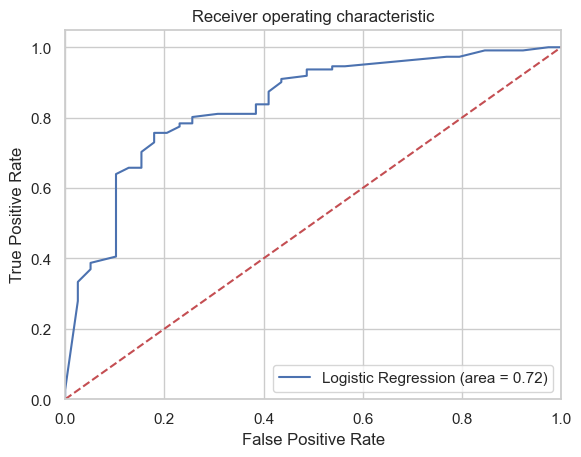

In [46]:
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test[features[:8]]))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test[features[:8]])[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## CONCLUSION

> In this end-to-end data science and machine learning project. we predicted the likelihood of reassault and learned the following concepts:
>
> - Data wrangling
> - Exploratory data analysis
> - Statistical testing
> - Handling class imbalance
> - Logistic regression